# EXERCICE1

In [364]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct  4 08:39:27 2016

"""



import pandas as pd
import numpy as np
from sklearn.neighbors.kde import KernelDensity
import sklearn.linear_model as lm
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures




#on importe nos donnees
galton = pd.read_csv("http://www.math.uah.edu/stat/data/Galton.csv")


In [365]:
#######################################################################
########################        1       ###############################
#######################################################################


galton["Father"] = (galton["Father"]*2.54)
galton["Mother"] = (galton["Mother"]*2.54)
galton["Height"] = (galton["Height"]*2.54)
galton["Father"] = galton["Father"].round()
galton["Mother"] = galton["Mother"].round()
galton["Height"] = galton["Height"].round()

print (galton.head(10))


  Family  Father  Mother Gender  Height  Kids
0      1   199.0   170.0      M   186.0     4
1      1   199.0   170.0      F   176.0     4
2      1   199.0   170.0      F   175.0     4
3      1   199.0   170.0      F   175.0     4
4      2   192.0   169.0      M   187.0     4
5      2   192.0   169.0      M   184.0     4
6      2   192.0   169.0      F   166.0     4
7      2   192.0   169.0      F   166.0     4
8      3   190.0   163.0      M   180.0     2
9      3   190.0   163.0      F   173.0     2


In [366]:
#######################################################################
########################        2       ###############################
#######################################################################

size = len(galton["Father"])
galton.dropna()
print (size - len(galton["Father"]))


0


    Family  Father  Mother Gender  Height  Kids
0        1   199.0   170.0      M   186.0     4
1        1   199.0   170.0      F   176.0     4
2        1   199.0   170.0      F   175.0     4
3        1   199.0   170.0      F   175.0     4
4        2   192.0   169.0      M   187.0     4
5        2   192.0   169.0      M   184.0     4
6        2   192.0   169.0      F   166.0     4
7        2   192.0   169.0      F   166.0     4
8        3   190.0   163.0      M   180.0     2
9        3   190.0   163.0      F   173.0     2
10       4   190.0   163.0      M   179.0     5
11       4   190.0   163.0      M   174.0     5
12       4   190.0   163.0      F   170.0     5
13       4   190.0   163.0      F   164.0     5
14       4   190.0   163.0      F   160.0     5
15       5   190.0   149.0      M   183.0     6
16       5   190.0   149.0      M   175.0     6
17       5   190.0   149.0      M   173.0     6
18       5   190.0   149.0      F   169.0     6
19       5   190.0   149.0      F   159.

C:\Users\Mohamed\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


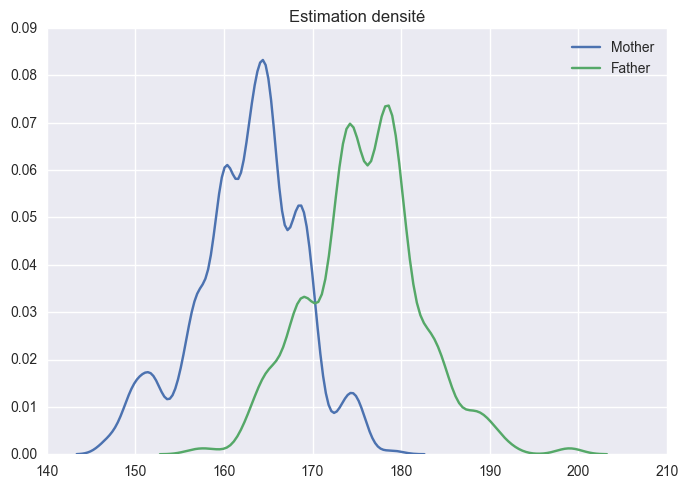

In [367]:
#######################################################################
########################        3       ###############################
#######################################################################


sns.kdeplot(galton["Mother"])
sns.kdeplot(galton["Father"])

print(galton)

plt.figure(1)
plt.title("Estimation densité")
plt.legend()
plt.show()



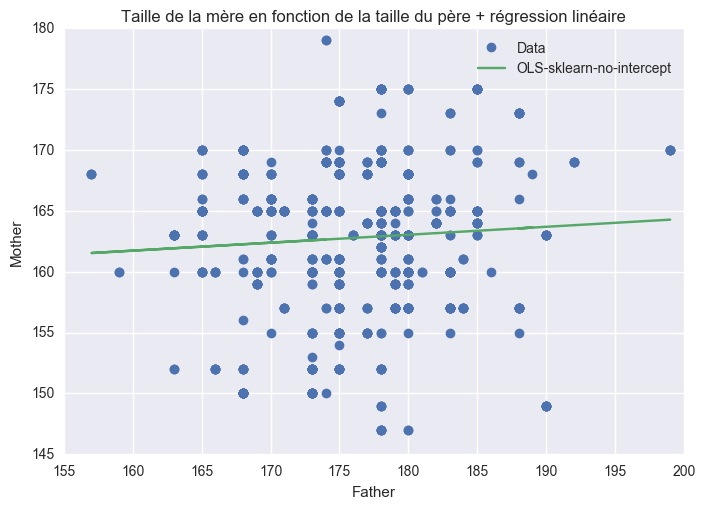

In [368]:

#######################################################################
########################        4       ###############################
#######################################################################

plt.figure(2)
plt.xlabel('Father')
plt.ylabel('Mother')
plt.plot(galton["Father"], galton["Mother"], 'o', label="Data")
y = galton["Mother"]
X = galton[["Father"]]

skl_linmod = lm.LinearRegression(fit_intercept=True)
skl_linmod.fit(X, y) # Fit regression model
plt.plot(X, skl_linmod.predict(X), label="OLS-sklearn-no-intercept")
plt.title("Taille de la mère en fonction de la taille du père + régression linéaire")
plt.legend()
plt.show()
#print galton.head(15)


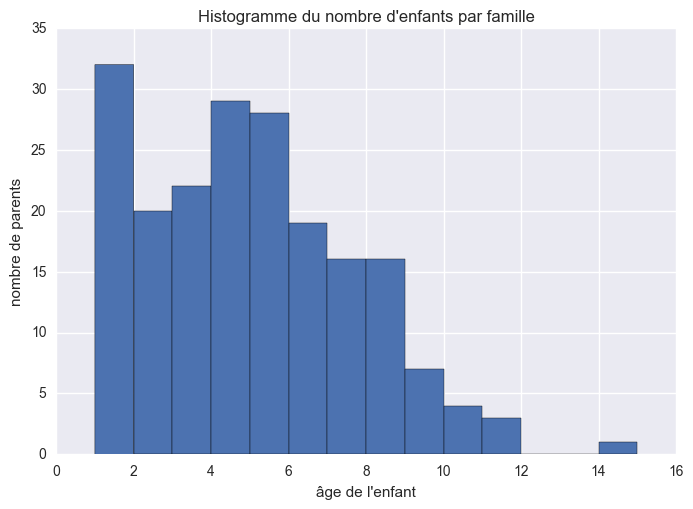

In [369]:

##########################################data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAlYAAAGHCAYAAAByLxwIAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAPYQAAD2EBqD+naQAAIABJREFUeJzsnXl4VNX5+D/vZINAAsha1rCoUECUWLeK4gqiBXcB0SrUqiigrVVrbVGLGz8UpepXK1ZsQbBVUFQWF1RUtLaJKyKobAqtZc8CJCRzfn+cO8nMZGZyJ7mTmYT38zz3Sebcc9/3Pefee+57z/JeMcagKIqiKIqi1B9fsg1QFEVRFEVpKqhjpSiKoiiK4hHqWCmKoiiKoniEOlaKoiiKoigeoY6VoiiKoiiKR6hjpSiKoiiK4hHqWCmKoiiKoniEOlaKoiiKoigeoY7VQYaIDBKRqSLSMdm2KIqSXA7W9kBEejrlPjzZtijREZHzReTXItKofJWkGisiWSLiF5Gbg9KucdI6BKV9KCJLGsAeT/WIyAIRWeOVPI/4HMgH5ouIJNuYRCIivxORDSJSISKrkm1PJFLtGhGRYc79d4xH8g535F3shTwvEJH7RGRfWNp/ReSxoN+e1kMMWxpETwwOmvYggIhkAv8ADjPGrE22PfUl0jOzAXUn7L4RkROAucCXxhh/HWU0iO8QjmvHyqms2rZKETkpThuMs0X7TYTficJrPZHKklScC/QSIBu4K8nmJAwRGQn8EXgDuAKYmkRbujlvxz+OsNsAdWo0EkhKXbPB1FKXbolU55HK3FjbHfeKD5L2IIyHgD3YdqEpkMznTELuGxE5BJgPTDLGLK2HqKTUTXoceceF/f45cLqTHvym4/rt2xhTJiLNgQNx2KHUE2PMPhE5B7haRFoYY0qTbVMCOAXYb4y5KtmGAN2xjt0a4MuwfeH3jxKbWHXplt8Bf/DMokbOQdIeACAibYGtwK3GmKby3Pkz8LQxpjzZhhhjlotIcw9sOQq4zRgzr55yhpDKjpUx5tng3yJyPHC6MWZ+fQxIhYvhYMQYsx24221+EWlmjNmfQJO8piNQkmwjHKI6TsaYyoY0pAlQbyfU6aVJtV7CpJIq7YEz52kNcJwx5iMP5DU3xlQN+xpjdgDT6is3iq50R0dFIuRHwxhjgJR5jnrxTDfGvOmRLbWei0RcywmZYyUizURkmogUiMgeESkWkbdE5Kdh+WrMsYpTx90i8q2I7BeRjY7ODJfHXy8i60Vkr4isEpFjE6EngrzfOvp2OLr/6QxbuTn2QxH5SESOEpF3RaRURNYGjheR00TkX47c1ZGGZZ2hlL+KyA9OeT4TkcvD8gTGyc8TkftFZAtQ4sxNQEQOEZFHROQ7ESkTkXUi8qs46uBnIvK+iJSIyG4ReVFEDgvLs0BEtjn2vuJcQz+ISMzGP3BNYYc32gUNUV/s7E8Xkbucc1/m/L0j0CgGyfmviPxdRIY6dbpPRL4WkUsi6DxERGaJyCanTjeJyF9EJFdEhgErsW9NCyLYU2OOlYjkOPK+d+StEZHJkcopItNF5ELnfAfO56kuz0MPEXnZOQ//FZHpQMTrWkR+KiKvi72fS0TkTanjPArn+v2rU/f7RGSriDwhIq1qOa62ujxFRJ4Xkc1B9+r9ges2SE6NOVZx2F7nenBb3xI2byUovdb5ImHXxRXOvblPbDtzXIT8SW8PIlCnHgapbh+PFZH3RGQv8Pug/bW2O06+sc49t09EPhGRs8PvU6meO3idiNwkIuuBfUAvZ7+r54aIjHBs2i22jVsjIlPD8vxKRL4U297vdM7l+UH7I86xEpEpjrz9YtuSh0SkZZQ6Gygi74h9dnwnIlPqeA5qzLGKR0cc9XaViKxwrtt9IvK5iIyPIC/knmmoazmeocB4aAtcDiwAHgdaA78AXheRwcaYr+ojXOwKgaXAYEf+19iuw1uwF/bYWo6/DpgFvA08ABwKvAoUA7u80hOFKcBzwF+BLOxQ0EIROdMYs6KWYw3QAXgJ+Bu2fq8H/u40hg8Bj2An/N0CPC8i3YwxZU55ugAfAfudvDuBc4A5YocA/i9M3x+BUuB+oAVQ6dyY7wGHOHWyBTgJmCEi7Ywxt8UqgIj8Att1vRi4GWgJXAe8JyKDjDH/CSprBvA69jzdBAwHbhWRdcaYZ6KoKMfW6fVAf+AabC/HB87+ucBF2PH794GfYoeFDgUuDZJjgB8Dzzr2Pg1cBcwVkX8ZY9Y75ckFVgF5wGzgU+w5Ohfo5Pz+I7aBfwT40JH/QZCeqgdJ0DV3HPAE8AVwNvCQiHQ0xvwurLynA6OBx4C9wK+AF0SkuzGmOEod4ZzHt4D2wExgO3Z4/8wIeYdjr7kPqB5C+wXwtogcZ4z5LJqeKJwFdMbW1w/AQOBq4HBgaIzjaqvLS7Bt2iPY+/g44NfY8/DzIDl1mndRn3qIp75j2BaPzcOw98EjQAX2HlsuIvnGmG8cm5LeHkShrr2SBnuuX8a2j3Mce1y3O47DMhf4N7YNbefI2krk+r8WSMPefxXAHrfPDRE5EngR+Bd2eLocOAw4oaoiRCYBM4B5wINAc+BI4FhgYVC5Q2wTkfucci4B/oRty64HBovIyU4vV+DYDk6+Bdj2bjTwoIh8Yox5J1plxyDSHOladcT5vJ2IrbdF2N7nc4HZImKMMU/HsCVAYq9lY0ydNuzJqoyyzwekhaW1wTYmfwpKy3Iq5eagtKuBSqBDUNoHwJKg37/AXoT5YTomO8ceGcPuLGAH9qHqC0q/3rHFEz1OvvnYFQ0h+sN+ZwBfAS+7qPMPHL0jg9IGOnaXAwOD0n/m5L04KG0usBloFSZ3EbANSHd+D3Nkrg6kBeWdhn1odQtLfxDbQLePYX8roAiYGZbe2Ul/KKzuKoFfheX9Aljpoq7mA/8LSzvGKddDYemzHF3HBqX9B9tQ5ofZWQ7cFZR2v3PsmTFs+amj9+Iodn4Z9PsSJ+8NYflecnR3Cbt3SgNpTvpPnPTxtdTPLY7dI4LSsoENTvoxQffyBmBh2PHZzrX0Yi16Dg8ve/g94KT93NGbX4u8WHUZSe5U7BzO9kFp9wJ7w/L9B3gs6Pcwj+vBVX1HsiUoPaQdjKIncF0cAPoFpfcCyoC5QWlJbQ9quV6Oiee4oPqpBMaFpcfT7qzFPtCzgtLOcGz6MoKd24DcMLmunhvONVEBZMco01Lgo1rKHfLMdMp1AFgUlu9XTr5LItTZ+UFpzZxy/dVFnce8b+LR4bbeAtd5BFtWAJ/Humca6lpOyFCgMcZvnLkjYmmD9eoLsd5ofbkQ+/a6UUTaBjZsxQp24nI0jsc6ef9nQpdwPol94/dKT0SM03sEICKtsTf9+7ivlx3GmMVB8j7HnvRPnP8D/NOxMdA1nQaMwvaW7Rc7ZJAlIlnYh/YhwBFhuv5iao5RX4gt/96wOnkDyAROjGH7COzbwYKwY8uBAiLX55/Dfr8XKFMdGIF9g5kZlv4Atq7ODkv/2BhTEPhhjNkKrA/Tfz7wT2PMa3W0KZyzsEMKj4elP4jtjRkWlv6qMWZLkI3/wj5Aa6ujs4CNxpiqbnJjzF7gqbB8xwA9sMvxg89ZNrYHpr73QDNHXuB6rXP7ECY325G7CusUHVlXuQ71rQe39e0VbxtjqoaujO1hXeLYkSrtASLSMuy4Ns6uVsHpIpLjstzF2N6dYFy1OyLSE9tz/XTwtWSMeR3rbEVigTGmKCzN7XNjt/P7vBjl2Q3kicigWIUO40zsNR/ezj2GfVaEt3M7jTGB3i+MnW9UQN3b2Ui40eH6eRt2r7cSkXbYaQL9JGzoPwqeX8vBJGooMND1egO2azNYT11X8gRzKHboZVuEfYFux2j0cPJ8E3KQXaG4yUM9ERGR84DfYnuasoJ2hTt10fguQtqeCOl7nL+BhqoztnH5FXZ4JByDHaYIZmOEfH2w9RKpMaitTvoQOiwXfuz/wtJ2G2PCJ6DvorpM8dIDKDfGhJxnY8wmsXNueoTl3xxBRrj+ntgHq1f0AL4zNSdTrgnaH0yk62E3tddRD+zbeTjhaYc6f5+LkNcARkSyghu62nAawTuxDVnwNWewLxp1QkTysG+dI7DTDzyR61DfenBb317xTYS0dcBIZ/i6FclvD8C+0NaYtwgsD/u9DHtea+M743QzhNkYq935wfk/cG99GyHfN9h7PZyNEdLcPjf+hg358FcReQD7AH/BGLMoKP892OGoj0VkHbZe5pnYE/sD5VgXotiY/c4zzm071y2Gjnhxo8P181ZETgbuwL7wNA/Ll4sdHYvFxghp9b2Wq0iIYxU0nv137EqT7diuvKnUvFnrgg/r7d5C5PH4cAcpJfSIyBnAC9h5Q1cD/8V2BV+DndvghmiryKKlB+wO9E4+DkSbnxQ+9y08iGJA1qvYORluZATjw16gFxM0ly2I8NUktZUp0SRbvxsSbWPgnE0meiiVeFcBvYh9sZiODVBZih0aeJk6LqgRu/hghSNnGvahshfbUD9ZV7lBJKIeohHuGARI80g+pEZ7AHauy5NBv7th5zNeH3ZsbQ/KiDY6xNvuxEM0fbU+N4wxe8UGwTwN6zQOB8aKyBJjzDlOns/FTrA/x9l/MTBJRH5rjLm/HnYH0xDtnBsdrupNRPoCr2F7t6YA32PP4bnYeXNu7vVEXMtVJKrH6gJgtTFmdHCi2FUwXvAt0MMYU5eegk3Yk3Yo1ZNfcbrAexDqLNVHTyTOx/YknRU8DCl2Mn2i2Yq9mJrX8rYTFWOMEZGN2DkBtU20j0TgTfAHY8x7dbGhnmwCMkWkR3CvlYh0x7711MUh3wAMqCVPtAdlJDYBx0To/egXtN8LNlHdCxNM37Df32Lvlz11POchiP10ygnAb4wxDwSl11aHAaLVZT7WibrIGPNCkNxz8OYBUd96cFvfYB/+rSOk98C9gxFJ12HYXuAip4c22e0BxpgvCRrFkOpPzPy7rnZFwG27E7i3+kTY14fozkEkfa6eG07v2hvO9isRuRO4XUROMMascvKUYntKnxO7Ou5VYKqITI/QOxdcjsOxL+9A1TOuO3Zifiritt5GYX2XEcaGCQFARMKHOF3jxbUcTKI+aVNJWGMmdum/F/OrwPaE9RKRy8J3OHMrmkc4JsAH2KGSayX0+0O/xM6X8EpPJCqxE+eq3jxF5FDcdXHXC2OD4b0EjHY8/hCk5rfCoj3A/g4MlcihHNoEef6RWILtRbjdmeMRfnzbGMd6wRLsdXlDWPqvseV9tQ4yXwCOFRsKIBqBgIuRHpbhLME6edeEpd+I7d1cFreF0fXkBTdGYlfFhC9Z/hA73HhzpOvdGdaLh8DDKbztuRF3Dmi0uqwh17kWp7iUWxv1rQe39Q32AXNCcPskIuHDprVxsoj0Dzq+N7adWQop0x40FK7aHWPMBuxcqitEpFnQ/mFEdlSj4eq5ITa6eDifOn+zIuVxzttX2GdItJA/r2GfM+HhDCZi25ZX3BWjwXH7vI10r7elZhDzaCT8Wk5Uj9UrwGMi8jx2TLgP1nH5Em+cuaewS+afFpEzsc5SBnZJ6UXYSWYR53I5c6mmYrv7VojIP7BvcpdSc9y1znqi8Ar24l4mIs9h5z1NxN4oDfEx0JuwNv9LRP7s6G2PHac+xrEnQLSL6B7s5MfXReQvwCdADnai6/nYceiI88WMMTvFxmN6Evi3Uwc7sD0N52CvlbhjmrnFGPORo3OyiLSnOtzCWGC+MeafdRB7D3ZMfrGIPIWtj3bYbulxxph12Hk0pcD1InIAWz/vG2O+jyDveceuGc4QQCDcwlnAvc4Eei94DLtU/DkReRg7v+0K7EtH90AmY0yFiFyFfQh/LiJ/xfZ+dsWGethC5DkyETHGbBeRj7APuRbY+S1nOfLcNFwR6xI7pLgZ+JOI9HLyXIxdVl9XquzxoB5c1bfDbOxw6VIRWYhtn0Zje0fdshp7jz6CfchOxFnRGpQnqe1BQxFnu/M7bO/Qe8457oA9b6tx/+xy+9y4W0QGY1+WNgM/wp6n9djFHADviMi3WMf+f1SHJlloogTiNMZsFZEZ2JeAV7COZX/nuPew30lMJHV1pt3W2zLsdbdURGZjX7J+ib0H3bzoJf5adrt8MHzDhluoiLJPgNuxjkopNlbK6dil5auD8mVhvc/fBKVFC7fwapiOdOBW7INnH3bC24dOWtTlq0HHX4+9gAMN87HYFUSe6Qkvr5N2FdXzPz4HxhBh+XcUeR9gV6CFp28FngtLC9Tt/WHpHYFHsd3F+7Hj08uAy4LyBJbMjohiR0vgPuzb3T5sd/M7wCRAXJTjVGxjtgsbHX0tdk7eEWF190OEY+8FSl3oiHZ8OnbS43qn/Ouxc//Cw4PUqNMY12Jbp06/d+pjg1Oe3KA852Eb5zKCwmBEuUZaYh3/7x0b12C/mVXr+Q2y/VEXddQDO6+pBLts+j5swxKyXNrJexQ2bs4259r9Frtc/8RadBweXF4nrSt2Sf9O7APub05aSFsQQ2a0uuyPHVIpcq7JP2F7ycP117iGwuuMCMvG61MPdajvm53zX4pdHDGQCO1TBB2BcAvTsSEsvnbs/BAbzTw8f9LbgyjXS13DLdRoH4P219ruOPnGYu+5fdiH61nOeSuIYOfEKLpqfW5gn4kvUt1ubMbG3uoRJGcidrXb/5zzuBY7L615UJ4az0wnPTAfMHBeZwIt3dQZEdqlKOWs9b6JR4ebenPyjQI+c+rka6estfoODXUtiyNMURRFaeQ482j2ATOMMQnr/T3YEBt1fZ0xZlSybVFSn0TNsaozIjJERBaLyBaxoedHhu1vIdUh5wOfbrk6LE+WiDwqItvFfibgeQkL968oiqIowYj95JUvLG04tofKy7AqShMm5RwrbGyVT7BdoJG602ZiA6CNxa6omQk8Inb1T4CHsF3sF2BjgHTGTjJWFEVRlGj0BlaLyB/Efo/uIeyw9SYSF8xVaWIkLEBoXTHGLMNZ+RRlFv7xwDPGmHed37NF5BrsZMtXxAa/Gw+MNtXfILoSWCMixxjvlvAqiqKkIgZvVkIejGzDzt35JXYidBF2Tt1vTYxvbypKMCnnWLlgFTZ68NPGrn44BbsUNhCpNx9brjcDBxhj1orIZqxTpo6VoihNEmNjn3kZSPSgwhizkzhWuSpKJFJxKLA2JmFXOnwvIuXYpaTXGWPed/Z3wn62JPz7TT84+yLixMkYLCLhsawURVEURYmBPkOraYw9VpOxoRHOwS5PPQkbM2urqV/E1COxYRcKRST8+3TLqPntKkVRFEU5GBmG/cROMC2x4U1+ih1ZOmhpVI6VEw33buBcY8xSJ/kLETkKG+xuBTbuRKaI5Ib1WnUkKLx/BPKcv5Giw5+EDR6mKIqiKEp08lDHqlGR4Wzh32yqpHpYswD76Y/TsKs5At+f6k7kr5sH2Agwd+5c+vXrFyNb4+DGG29k5syZyTbDM7Q8qUtTKgtoeVKZplQWaFrlWbNmDePGjYOaXzA56Eg5x8r5zEUfqsPO9xKRQcBOY8x3IvIO9nMfk7BLYIcCl+N8/83YD4w+BTwoIruAYmAW9hMisSau7wfo168fgwd79UnD5NGqVasmUY4AWp7UpSmVBbQ8qUxTKgs0vfI47E+2Ackm5Rwr4GhsILbAkuEHnPRnsGEULsF+kmIucAjWufqtMebPQTJuxPZiPY/9xMMy4LqGMF5Rmgp+vx+frzGub1EURUkeKedYObGnorbmxpj/ARNqkVGGXT04yVvrFKVps3XrVs4660pWr96CMa0R2U3//l1YuvRpOnfuXLsARVGUg5yUc6wURUkOW7dupVevoZSVPYT97qwAhs8+W0qvXkNZv/5tda4URVFqQfv5myhjxoxJtgmeouVJPGeddaXjVI2geoqjACMoK5vJiBHjIx6XimWpD1qe1KUplQWaXnkUixijXz4AEJHBQEFBQUFTnEyoKBHZvHkz27dvB+AnP7kIv//vVDtVwRjS0i7ho4/+3qD2KYqSGrRr147u3btH3V9YWEh+fj5AvjGmsMEMS0F0KFBRDlI2b95Mv3792Lt3b1Dq0VHzV1YSaDgVRTnIyM7OZs2aNTGdK8WijpWiHKRs376dvXv3NpnYbYqiJIZAjKrt27erY+UCdawU5SCnqcRuUxRFSQV08rqiKIqiKIpHqGOlKIqiKIriEepYKYqiKIqieIQ6VoqiKIqiKB6hjpWiKIqiKIpHqGOlKEqT5JlnnsHn81VtzZs3p0uXLgwfPpw//elPlJSU1EnuBx98wJ133klRUZHHFiuK0hRQx0pRlCaLiDBt2jTmzp3L448/zuTJkxERbrjhBgYOHMjnn38et8xVq1Zx1113sXv37gRYrChKY0fjWCmK4hpjDCKRPnmTurKHDx8eEqfrlltu4e233+bss89m1KhRrFmzhqysrLjsVBRFiYb2WCmKEpPi4mImT55Kz56n063bufTseTqTJ0+luLg4pWXHYujQofz+979n06ZNzJ07F4DPP/+cK6+8kt69e9O8eXN+9KMfMWHCBHbu3Fl13J133snNN98MQF5eHj6fj7S0NDZv3gzA008/zWmnnUbHjh1p1qwZ/fv35/HHH09oWRRFSS20x0pRlKgUFxdz/PEXsGbNr/D778B+oNnw6KPLWbHiAj744AVycnJSTrYbLrvsMm677TZee+01JkyYwOuvv86GDRsYP348nTp1YvXq1TzxxBN8+eWXfPDBBwBccMEFrFu3jgULFvDwww/Ttm1bANq3bw/A448/zoABAxg1ahTp6em8/PLLTJw4EWMM1157bcLKoihKCmGM0c127Q8GTEFBgVGUg4GCggJT2zU/adIfjM+31ICpsfl8S8zkyVPrrD+Rso0xZs6cOcbn88UsX+vWrU1+fr4xxpj9+/fX2L9gwQLj8/nMe++9V5U2Y8YM4/P5zKZNm2rkjyRj+PDhpk+fPnUpgqKkBG7aikAeYLBJgWd6MjcdClQUJSovv/w+fv+wiPv8/uEsXvx+Ssp2S8uWLauGHYPnWZWVlbFjxw6OPfZYjDEUFha6khcso6ioiB07dnDSSSexfv36hA9vKoqSGqhjpShKRIwxHDjQAjtEFwnhwIHsQI9vysiOh5KSkqrhxl27djFlyhQ6depE8+bNad++Pb169UJE2LNnjyt577//PqeffjotW7akdevWtG/fnt/97ncArmUoitK40TlWiqJERETIyCjF9u5HcoAMGRmldVrJl0jZbtmyZQt79uzh0EMPBeCiiy7iww8/5Oabb2bQoEG0bNkSv9/PsGHD8Pv9tcpbv349p59+Ov369WPmzJl069aNzMxMXn31VR566CFXMhRFafyoY6UoSlR+9rOf8uijy/H7h9fY5/MtY+TIE1NSthv++te/IiIMGzaM3bt3s2LFCv74xz9W9TABfPPNNzWOi+bsvfzyy5SXl/Pyyy/TpUuXqvQ333zTe+MVRUlZdChQUZSo3H33TfTr9yA+31Js7xKAwedbSr9+M5k27dcpKbs2VqxYwbRp0+jVqxdjx44lLS0NoEav0syZM2s4Ui1atACoESA0kow9e/YwZ84cr81XFCWF0R4rRVGikpOTwwcfvMDttz/A4sUPcuBANhkZexk58qdMm1a/cAiJlB3AGMOSJUtYs2YNFRUV/PDDD6xYsYLXX3+dnj17snjxYjIzM8nMzOSkk05i+vTplJeX06VLF1577TU2btxYY55Xfn4+xhhuu+02Ro8eTUZGBiNHjuTMM88kIyODc845h6uvvpri4mJmz55Nx44d+e9//1vvsiiK0jhQx0pRlJjk5OTw8MN38PDD3kdHT6RssMN2U6dOBSAzM5NDDjmEgQMHMmvWLK644oqq3ieA+fPnM2nSJB577DGMMQwbNoylS5fSuXPnELuOPvpopk2bxuOPP87y5cvx+/1s2LCBww47jBdeeIHbb7+d3/zmN3Tq1ImJEyfStm1bJkyY4Gm5FEVJXSTRq24aCyIyGCgoKCgI+fyFojRVCgsLyc/PR695RVFi4aatCOQB8o0x7uKTNFF0jpWiKIqiKIpHqGOlKIqiKIriEepYKYqiKIqieIQ6VoqiKIqiKB6hjpWiKIqiKIpHqGOlKIqiKIriEepYKYqiKIqieIQ6VoqiKIqiKB6hjpWiKIqiKIpHpJxjJSJDRGSxiGwREb+IjAzb7xeRSudv8PbroDxvh+2rFJHHGr40iqIoiqIcTKScYwW0AD4BJlL9yftgOgE/cv52AsYDfuD5oDwG+DPQMSj/zYkzWVEURVEUJQU/wmyMWQYsA5AIX2Q1xvwv+LeInAu8ZYzZFJZ1rzFmW8IMVRRFURRFCSMVe6xcIyIdgBHA7Ai7LxWRbSLyuYjcIyLNG9g8RVGUOrFp0yZ8Ph8PPvhgzHzvvPMOPp+PlStXNpBljZc77rgDn69RP/KURkJjv8quAIqARWHp84BxwFDgHuAy4G8NaZiiKKnDl19+ybhx4+jatSvNmjWjS5cujBs3ji+//DIk3zPPPIPP56OwsDCmvO3btzNlyhT69etHdnY2HTt25Nhjj+XWW29l7969iSxKDSJ07CsREJE6O1YffPABd955J0VFRR5blVzuvfdeXnrppWSb0eRIuaHAOLkSmGuMKQ9ONMYE92CtFpH/AG+KSE9jzIZYAm+88UZatWoVkjZmzBjGjBnjlc2KojQgCxcuZOzYsbRt25YJEybQs2dPNm7cyFNPPcXzzz/Pc889x6hRo6ry1+ao7Nq1i/z8fEpKShg/fjx9+/Zlx44dfPbZZzz++ONMnDiR7t27J7pYSpz8/ve/57e//W2djl21ahV33XUXV155Jbm5uR5bljzuueceLrroopDr3w3z589n/vz5IWl79uzx0rRGTaN1rERkCHAYcJGL7B8BAvQBYjpWM2fOZPDgwfU3UFGUpLN+/Xouv/xy+vTpw8qVKznkkEOq9k2ZMoUTTzyRyy67jM8++4y8vDxXMmfPns3333/PqlWrOPbYY0P2lZSUkJmZ6WURUpK9e/eSnZ2dbDPiwufz1fncGBNpHVX92bdvH82bN75ZKpE6GwoLC8nPz0+SRalFYx7bcXY9AAAgAElEQVQKnAAUGGO+cJH3KOxKwf8k1iRFUVKJ6dOns2/fPv785z+HOFUAhxxyCE888QQlJSVMnz7dtcz169eTlpZWw6kCaNmypauH97///W+GDRtG+/btyc7OplevXkyYMKHW4375y1+SlZXFiy++GDPfP//5T4YPH07r1q1p0aIFQ4cOZdWqVSF5Nm/ezMSJE+nbty/Z2dm0a9eOiy++mE2bQtcBBYZHV65cycSJE+nYsSPdunUDquctffvtt1xxxRW0adOG1q1bM378ePbv319reYLnkj355JP06dOHZs2accwxx/Dvf/+7Rv4VK1YwZMgQWrZsSZs2bTj33HP56quvatUTbGswPp+PyZMn89JLLzFw4ECaNWvGgAEDWL58eVWeO++8k5tvtovK8/Ly8Pl8pKWlsXnz5qo8c+fO5eijjyY7O5u2bdsyZswYvv/++xBdQ4cO5YgjjqCwsJCTTjqJFi1a8Lvf/a5q/9KlSzn55JPJzc2lVatWHHPMMTV6hdyc10A5165dy8UXX0yrVq1o164dN9xwA2VlZSFl37t3L3PmzMHn8+Hz+Rg/fryrulRik3I9ViLSAtuzFOiP7yUig4CdxpjvnDy5wIXAjRGO7wWMBZYAO4BBwIPAOy6dMEVRmgivvPIKeXl5nHDCCRH3DxkyhLy8PF599VXXMnv06EFFRQV//etfufzyy+O2adu2bQwbNowOHTrw29/+ltatW7Nx40YWLlwY9Ri/38+VV17JP/7xD1566SWGDx8eNe+KFSsYMWIERx99dNVD9umnn+bUU0/lvffe4+ijjwbgX//6Fx9++CFjxoyha9eubNy4kccee4xTTjmFL7/8kmbNmoXInThxIh06dGDq1KmUlpYC1cOmF198Mb169eK+++6jsLCQ2bNn07FjR+69915XdTJv3jxKSkq45pprEBHuv/9+LrjggionFuCNN95gxIgR9O7dmzvvvJN9+/Yxa9YsTjzxRAoLC2sdfhWRiMO87777LgsXLmTixInk5OQwa9YsLrzwQjZv3kybNm244IILWLduHQsWLODhhx+mbdu2ALRv3x6Au+++mz/84Q+MHj2aq666im3btjFr1ixOPvlkPv7446qhQxFh+/btjBgxgtGjR3P55ZfTsWNHAObMmcOECRMYMGAAt912G61bt+bjjz9m+fLlVT1Dbs9r8Dnp2bMn9913Hx9++CGzZs1i9+7dzJkzB7DO4IQJEzj22GP55S9/CUDv3r1dnS+lFowxKbUBJ2PjUlWGbX8JynMVUALkRDi+K/A2sA3YC6wF7gVa1qJ3MGAKCgqMohwMFBQUmHiu+dLyUlOwtSChW2l5qWfl27NnjxERc95558XMN2rUKOPz+UxJSYmZM2eO8fl8Mevkhx9+MB06dDAiYvr162euvfZaM3/+fLNnzx5Xdr344ovG5/OZwsLCqHk2btxoRMQ88MADpqKiwlxyySWmRYsW5o033gjJ9/bbbxufz2feeeedqrTDDjvMjBgxIiTf/v37Ta9evcywYcNC0sL55z//aUTEzJ07typtzpw5RkTMySefbPx+f0j+O+64w4iIueqqq0LSzz//fNO+ffsYtRBazvbt24fU3+LFi43P5zOvvvpqVdqRRx5pOnXqZHbv3l2V9tlnn5m0tDRzxRVX1KrrjjvuMD6fLyRNREyzZs3Mhg0bQmSKiHn00Uer0mbMmGF8Pp/ZtGlTyPGbNm0y6enp5r777gtJX716tcnIyDD33ntvVdrQoUONz+czTz75ZEjePXv2mNzcXHPCCSeYsrKyqPa7Pa+BcxJ+3V933XXG5/OZzz//vCqtZcuW5sorr4yqM4CbtiKQBxhsUsCXSOaWcj1Wxph3qGWI0hjzJPBklH3fY1cDKoriIV9t/4r8Pyd2DkXBLwsY/CNv5jgWFxcDkJOTEzNfYL/bFV8dOnTgs88+46677mLRokU88cQTPP7442RmZnL77bdz++23xzy+devWGGNYvHgxAwcOJD09ejNcXl7OhRdeyJtvvsnSpUsZMmRITNmffPIJX3/9Nb///e/ZsWNHVboxhtNOO425c+dWpWVlZVX9X1FRQVFREb169aJ169YUFhZy6aWXVu0XEa666qqIPT4iwtVXXx2SNmTIEF588UVKSkpo2bJlTJsBRo8eHTIpfMiQIRhjWL9+PQD//e9/+fTTT7n11ltDFhcNHDiQM844gyVLltSqIxpnnHFGyPy6gQMHkpubW6U7Fi+88ALGGC666KKQ+u7QoQOHHnoob731FrfeemtVelZWFldccUWIjNdff52SkhJuvfXWqMPI8ZxXsOfkuuuuC0mbNGkSjz32GEuWLGHAgAG1lk2pOynnWCmKkpr0bdeXgl8WJFyHVwQcpoCDFQ23DlgwHTt25NFHH+XRRx/lm2++Yfny5dx///1MnTqVzp07M378eEpLSykpKak6Ji0tjXbt2nHyySdz4YUXctdddzFz5kyGDh3Kueeey9ixY2s8WO+55x5KS0tdOVUAX3/9NUDUIUqfz8eePXto1aoV+/fv55577mHOnDls2bKlaoK2iERc4RVrcn/4MFybNm0Au4KyZcuW7Nq1i/Ly6sXbzZs3D3GkAnO2ArRu3brqeKBq3tdhhx1WQ3e/fv147bXX2LdvH+np6ezcuTNkf4cOHWKu9AzXHbA/oDsW33zzDX6/nz59+tTYJyI1zmeXLl1qONLffvstAP3794+qJ57zGiDcpt69e+Pz+di4cWP0AimeoI6VoiiuyM7I9qw3qSHIzc3lRz/6EZ999lnMfJ999hldunRx1bMSiT59+tCnTx9GjBjBoYceyrx58xg/fjwzZszgzjvvrMqXl5dX1Qvy97//nY8++oiXX36Z5cuXM378eB588EE+/PDDkNV2w4cPZ9myZUyfPp2hQ4fWOjHe7/cD8MADDzBo0KCIeQLlvP7663nmmWe48cYbOe6442jVqhUiwiWXXFIlJ5hYq9cC86DCCThr559/Pu+88w5gHY6f//zn/OUvf3F9vFtWrVrFKaecgohgjEFE2LBhQ8z5V/XR7ff78fl8LFu2LGKMrPBrqq4rAOM5r9HQeGcNhzpWiqI0Wc455xxmz57NqlWrIk5gf/fdd9m4cSPXXnttvXX17NmTNm3a8J//2MXHP//5z0N6mcIfqscccwzHHHMMf/zjH5k/fz6XXnopCxYsCFmZddxxx3HNNddw9tlnc9FFF7Fo0aKYQS4Dk49zcnI49dRTY9r7wgsvcMUVV4SsiCwrK2P37t3uC+2SBx98MKQHqHPnznEd36NHDwDWrl1bY99XX31Fu3btaN68OYMGDeKNN94I2d+pU6c6WBxKNKekd+/eGGPIy8uL2GvlhoCML774gl69ekXNA+7Oa4Cvv/66qt6gunctuOdRna3E0JjDLSiKosTkN7/5Dc2aNePqq6+uMUS0c+dOrrnmGlq0aMFNN93kWuZHH30UMbr6Rx99xI4dO+jb1w5n5uXlceqpp1Ztxx9/PEBExyXQCxG8HD7AqaeeyoIFC1i6dCmXXXZZTNvy8/Pp3bs3M2bMqFq5F8z27dur/k9LS6vRMzVr1iwqKytj6qgLRx11VEhdBOrILZ06deLII4/kmWeeCZkL98UXX/Daa69x9tlnA3YIMVjPqaee6klcsRYtWgA1z93555+Pz+cL6ZkMJvyai8SZZ55JTk4O9957b8TzD/GdV7C9bY8++mhI2qxZsxARzjrrrJByJcKRPtjRHitFUZosffr04ZlnnmHcuHEMHDiwKvL6hg0b+Mtf/sKOHTtYsGABPXv2rDrGGMNTTz3F0qVLa8ibMmUKf/vb35g3bx7nnXce+fn5ZGZm8uWXX/L000/TvHlzbrvttpg2PfPMMzz22GOcd9559O7dm+LiYp588klatWrFiBEjIh4zatQonn76aS6//HJycnJ4/PHHQ+wNICLMnj2bESNG0L9/f6688kq6dOnCli1beOutt2jVqlXVJ0zOOecc/va3v5Gbm8uPf/xjPvjgA958803atWtXQ3+8Q3KJ4P/9v//HiBEjOO6445gwYQJ79+7lkUceoU2bNkydOjWhuvPz8zHGcNtttzF69GgyMjIYOXIkvXr1Ytq0adx2221s2LCBc889l5ycHNavX8+LL77I1Vdfza9+9auYsnNycpg5cyZXXXUVP/nJTxg7dixt2rTh008/Zd++fTz99NNxndcAGzZsYNSoUQwfPpxVq1Yxb968qvsguFxvvPEGM2fOpHPnzvTs2ZNjjjkmIXV4UJHsZYmpsqHhFpSDjHjDLTRmvvjiC3PppZeaLl26mKysLNO5c2czbtw4s3r16pB8gXAL0bYtW7aYL774wtxyyy3m6KOPNu3atTOZmZmmS5cuZvTo0eaTTz6p1ZaPP/7YXHrppSYvL880b97cdOrUyYwaNSok/MLGjRuNz+czDz74YMix//d//2d8Pp+5+eabjTGRwy0YY8ynn35qLrzwQtO+fXvTvHlz07NnTzN69Gjz1ltvVeXZs2ePmTBhgunQoYPJzc01I0aMMOvWrTM9e/Y048ePr1Enka6TQAiDHTt2RKzH8PAE4UQrpzHG+Hw+c9ddd4WkrVixwgwZMsS0aNHCtG7d2px77rnmq6++iqkj2Na0tLQaOiZPnlwjb3gdGGPM3Xffbbp162bS09NrlG3RokXmpJNOMjk5OSYnJ8f8+Mc/NpMnTzZff/11VZ6hQ4eaI444Iqp9r7zyijnxxBOrynbccceZ5557LiSPm/MaOCdfffWVueiii0yrVq1M27ZtzZQpU2qEc1i7dq0ZOnSoadGihfH5fFFDL2i4hfg2MSb5byKpgIgMBgoKCgr0kzbKQUHgExR6zStK0+HOO+/krrvuYtu2bTW+NlBX3LQVQZ+0yTfGxP6KeRNH51gpiqIoiqJ4hDpWiqIoiqIoHqGOlaIoiqIoikeoY6UoiqIoTYSpU6dSWVnp2fwqJX7UsVIURVEURfEIdawURVEURVE8Qh0rRVEURVEUj9DI64pykLNmzZpkm6AoSgqjbUR8qGOlKAcp7dq1Izs7m3HjxiXbFEVRUpzs7OyInztSaqKOlaIcpHTv3p01a9bU+IBrY8IYg4gk2wzPqKysJC0tLdlmeEZ5ebknH0FWkk+7du3o3r17ss1oFKhjpSgHMd27d9fGUlEUxUN08rqiKIqiKIpHqGOlKIqiKIriEepYKYqiKIqieIQ6VoqiKIqiKB6hjpWiKIqiKIpHqGOlKIqiKIriEepYKYqiKIqieIQ6VoqiKIqiKB6hjpWiKIqiKIpHqGOlKIqiKIriEepYKYqiKIqieIQ6VoqiKIqiKB6hjpWiKIqiKIpHqGOlKIqiKIriEepYKYqiKIqieETKOVYiMkREFovIFhHxi8jIsP1+Eal0/gZvvw7KkyUij4rIdhEpFpHnRaRDw5dG8YoDBw4kTfeuXbuSpjuZVFZWuspnjEmwJdEpLy/3XGZFRYXnMt3its7jwe/3ey5TOXhI5v3QWEk5xwpoAXwCTAQitdidgB85fzsB4wE/8HxQnoeAs4ELgJOAzsALiTNZSQTvvvsuaWl5iPQlM/NkRPqSlpbHu+++m3Ddv/jFLxDphkhfDjnkbET6ItKNX/ziFwnXnUzWrVtHu3aDEOlHevoQRPrRrt0g1q1bF5KvuLiYyZOn0rPn6XTrdi49e57O5MlTKS4uTriNy5cvR6Q7In3JyhrqnJvuLF++vM4yCwsLadbsUET6kpFxEiJ9adbsUAoLCz20PDJu6zwetm7dyqBBw0hPH0BGxkmkpw9g0KBhbN261UPLlaZKMu+HJoExJmU3rMM0spY8LwKvB/3OBcqA84LSDndkHRNDzmDAFBQUGCX5rFy50kAPA68a8Bswzt9XDfQwK1euTJjuCRMmxNQ9YcKEhOlOJmvXrjUieRHLLZJn1q5da4wxpqioyPTvf4bx+ZaG5PP5lpr+/c8wRUVFCbNx2bJlMc/NsmXL4pZZUFAQU2Yi2wS3dR4PW7ZsMVlZh0aUmZV1qNmyZUsCSqI0Fep6P9jjMMBgkwL+QzK3pBsQ07haHCugA1AOXBKUdgpQCeSG5d0ITIkhSx2rFMLnC9zYJsL2ivH5eiRMN3SNqRu6Jkx3Mmnb9oiY5W7b9ghjjDGTJv3Bcapq5vP5lpjJk6cmzEboVsu56Ra3zKysPjFlZmX1SUBJLG7rPB6OOOLMmDIHDRqWgJIoTYW63g/qWFVvqTgUGA9XAEXAoqC0TkC5MaYoLO8Pzj6lEeD3NwPOirJ3BH5/8wRqbxFTN7RMoO7ksWNHObHKvWOHnef28svv4/cPi5jL7x/O4sXvJ8ZAALKJfW5axC2xrCwtpsyysvS4ZbrFbZ3Hw+rVW2LKtPsVJTLJvB+aCo29hq4E5hpjPJvBeuONN9KqVauQtDFjxjBmzBivVCi1YCeqHwJIlBwCtObAgQNkZGR4qttOVK9d965du2jTpo2nupOJnTTdhtrKXVFRwYEDLWLmO3AgG2MMItHy1A07Ub32c1NeXk5mZqYrmXZibu0yKyoqSE/3trl0W+eVlZWkpaW5kun3+zGmdUyZfn8r/H4/Pl9jf69WvMbt/TB37lz+/ve/h+zZs2dPgq1rPDRax0pEhgCHAReF7fovkCkiuWG9Vh2dfTGZOXMmgwcP9s5QJW6ss7QT26sc6QY3wC7PnSrAcZZq192UnCrAeXDvorZyp6enk5FRGjNfRkap504V4DhLtZ8bt04V4DhLtcv02qkC93Xu1qkC8Pl8iOyOKVNktzpVSkTc3g/jxo1j3LhxIXsKCwvJz89PvJGNgMZ8d00ACowxX4SlFwAVwGmBBBE5HOgOfNBw5in1wefbDyyNsneJsz9RlMbUbfc3Pdq2zSRWue1++NnPforPF3kFns+3jJEjT0yMgQDsJfa52Ru3xKysypgy7f7E4LbO46F//y4xZQ4Y0DVumcrBQzLvhyZDsid5hW/YSRKDgCOxk9dvcH53C8qTC5QAV0WR8RiwARgK5APvA+/Wolcnr6cQ1asCXwlbmfKKge4NtCowsu6mvyqwZrlFekRYFbjEhK4KXNKAqwIjn5v6rQqMLLNhVgXGrvN4qF4VWFOmrgpUaqOu94NOXg/yJ5JtQA2D4GTHoaoM2/4SlOcqx7HKiSIjC/gTsB0oBv4BdKhFrzpWKcbKlSud1YF9DRxnoK/x+RIbaiGAda66huiGrp45VX6/3xM5XrN27VpnpVo/A4MM9DNt2x5R4wFfVFRkJk+eavLyTjfZ2UNMXt7pZvLkqZ45VQcOHIi6zzpX3ZxzMtD5261OTlWAgoICZzVU9fnOyurTIO1BaJ0fH7XO42HLli1m0KBhJj19gIHjTHr6ADNo0LAGd6oqKioaVF9diHWtHazU5X5QxyqFHaukVYQ6VilNeXl50nTv3LnTEzlFRUVm0qQ/mLy800yXLiNNXt5pZtKkPyS0hydeHnnkEcehPNx5yB9uoKt55JFHQvJVO56h+erjeFY35tUyIzXmM2bMiKh7xowZddYdTDIftF45ItXOWl+njvrW21lrDLrd4vZaU9zfD+pYqWNVsyLUsVISSDKDarrFOlU9TLTAgAHnKhEBVN0GJbROVfR8XjlXjZlEBB1tDLrdksyAsE0ZdazUsapZEepYKQkkmUE13eI2MGoiAqi6DUp4sAZvjYdEBB1tDLrdksyAsE0Zdayqt8a8KlBRGg3JDarpFreBUb0PoOo+KOHBGbw1HhIRdLQx6HaLBsBUEo06VoqSYIwxroNqJou9e/fiJjDgli1bXOWzgVbd4TYooQ1AWHu+0tKmGQ7DDfEEHW1Kut0ST0BYRakr6lgpSoIRkaCgmpFIXFBNt2RnZ1MdGDASBthFly5dXOWLJ4BqaFDC6DLtFxFqz9eiRfyftWkqhAYdjYSto3iCjjYG3W5xe60lIiCscvCgjpWiNADJDarpFreBUb0PoOo+KOHBGbw1HhIRdLQx6HaLBsBUEo06VorSANx990306/cgPt9Sqt+WDT7fUvr1m8m0ab9OpnkAPPLIrcBE4FWCbbS/Jzr7YcKEYTHz2f3xsWrVczFl2v0wY8YNMfPZ/Qc3q1b9A5HriFRHItexatU/mqRut7i91hSlziR79nyqbCRgVWBjCI7XWEhmbKGSkhJP5AQH1ezc+WeeB9X0guo4VqGBUaPHseprbCDR+gdQDQ1KeJSJFpSwOo5VqI1ehVrwKm5ZMklE0NFE6m7ogLnJDAjbVNFVgUH+RLINSJXNK8eqMQTHaywkM4hfIoJQVkeSP9xpzA9vsEjydaG0tDTqvhNOOCGofo6rqp8TTjihzvoWLlwYsc4XLlwY9RivnN5EBDxNFZL5ghdLd6oEzNXI696gjpU6VjUrwgPHqjEEx2ssJDOIXyKCUFZ/+zCyzFR1riJhnaroZamLc2WdqugyYzlX9SURAU+V2DSGgLlKfKhjpY5VzYrwwLFqDMHxGgvJDOKXiCCUtqcqukyfr4f3BUkQiaifZAb+1KCjDU9jCJirxIc6VtWbTl73kMYQHK+xkNwgft4HofT7m8WU6fc3j1tm8khEkM5kBv7UoKMNTeMImKsodUMdK49oDMHxGgvJDOJng0t6G4TywIEDrmTafKnN1q1bcVMWm88dZWVlrmTafN5iA5l6G/BUiY0xqR8wV1HqgzpWHtEYguM1FpIZxM8Gl/Q2CGVGRoYrmTZfatO5c2fclMXmc0dWVpYrmTaft9hApt4GPFVi0xgC5ipKfVDHykMaQ3C8xkJyg/h5H4TS59sfU6bd31hIRJDOZAb+1KCjDU3jCJirKHVDHSsPaQzB8RoLyQzil4gglG+//beYMu3+xsEJJ3QnVlns/vhYuHBWTJl2f2JIRMBTJTaNIWCuotSZZM+eT5UNz+NYNXxgvqZGMoP4JSIIZXUcq2qZqRzHKhbVcaxC68ebOFahMhMZaiFAaMDTat0aaiFxBAfMtXGsUi9gruIeXRVYvYkxOkEQQEQGAwUFBQUMHjzYE5mVlZU6p8ojKioqkvZh1NLSUs8/7HvgwIFGMafKDVu3bo1rTpUbysrKEjKnyg27dumcqobGGKNzqho5hYWF5OfnA+QbYwqTbU8y0aHABKJOlXck82vzXjtVQJNxqgDPnSogaU4VoE5VElCnSmlKqGOlKIqiKIriEepYKYqiKIqieIQ6VoqiKIqiKB6hjpWiKIqiKIpHqGOlKIqiKIriEepYKY0Cv9+fNN2J+Ibfvn37PJfZGHQ3BsrLyz2X6fYboU0t/E1TK4+iuEEdKyVl2bp1K4MGDSM9fQAZGSeRnj6AQYOGxfWB37ry7rvvkpaWh0hfMjNPRqQvaWl5vPvuu3WW+dRTTyHSDZG+ZGefhkhfRLrx1FNPeWh56uluDCxfvhyR7oj0JStrqFM/3Vm+PPJnV9ywbt062rUbhEg/0tOHINKPdu0GsW7dupB8xcXFTJ48lZ49T6dbt3Pp2fN0Jk+eSnFxcX2LlRSaWnkUJW6SHaE0VTY8iryueMOWLVtMVtahBl414DdgnL+vmqysQ82WLVsSpnvlypUGekTUDXWLlD579uyYMmfPnp2AkiRfd2Ng2bJlMetn2bJlcctcu3atEcmLKFMkr+pLDEVFRaZ//zOMz7c0JJ/Pt9T0739Go4tC3tTKo7hHI68H+RPJNiBVNnWsUosjjjjTeSiZCNsrZtCgYQnTbT87E123z9cjbpn2cynRZUJX7wuSArobA9CtlvrpFrdM+1mr6DLbtj3CGGPMpEl/cJyQmvl8viVm8uSpHpc2sTS18ijuUceqetOhQCUlWb16C3BWlL0jnP2Jwe9vFlO339+8DlJbxJQJLesgszHobgxkE7t+4o+8v2NHeUyZO3bYeXsvv/w+fn/kjzz7/cNZvPj9uHUnk6ZWHkWpC+pYKSmH3+/HmNZAtM9cCH5/q4RMaLcT1Q+JqRtaxzWh3U4Wr11mIiaVJ1N3Y8BOVK+9fuKZ0G4nqrepVWZFRQUHDrSIme/AgexAj3rKY4xpUuVRlLqijpWScvh8PkR2Y3uVI2EQ2Y3P5/3la7/htzOmbtgV17f+mjdv7kqmzectydTdGMjMzMRN/dh87rDfCN1Vq8z09HQyMkpj5svIKG0039ETkSZVHkWpK+pYKSlJ//5dgKVR9i5hwICuCdPt8+2Pqdvuj5fSmDLt/kSRTN2Ngb3Erp+9cUts2zYzpky7H372s5/i80VeeejzLWPkyBPj1p1Mmlp5FKVOJHuSV6ps6OT1lKJ6VeArYauqXmnAVYE1dUP3eq4KjCyzYVYFNrzuxkD1qsDI9VO/VYE1ZYr0iLAqcEnYKroljXIVXVMrj+Ienbwe5E8k24AaBsEQYDGwBfADIyPk6Qe8BOwGSoB/Ypc2Bfa/7Rwb2CqBx2rRq45VirFlyxYzaNAwk54+wMBPTHr6ADNo0LCEOlUBVq5c6awO7GvgOAN9jc8XO9TCvn37Ysq0Dk5XR+ZPnL9dYzo2JSUldS5DdN1Hu9K9a9cuV7L379/viY11YePGja7z7t27N+o+61x1Czs33erkVAVYu3atszqwn4FjDfQzbdseUeVUBSgqKjKTJ081eXmnm86df2by8k43kydP9cwJiVXuRBBcni5dRnpeHiU1UceqekvFocAWwCfARCIM1otIb+Bd4EvgJGAg8EcgeHzGAH8GOgKdgB8BNyfUasVzpk+fzqefrqai4gCQRkXFAT79dDXTp09PuO4hQ4ZQWbkRY9ZQXr4SY9ZQWbmRIUOGhOR79tlnqwJvNm9+alXgzWeffTaGdAOkEW0uygMPPFAls2XLM6pkPvDAA3UuT9euXbGTig2Q7vwVJ72aiRMnVulu02ZEle6JEyeG5Fu0aFFVvmbNTqnKt2jRojrb6JYBAwZU6c7LG1Ole8CAATXyug2M2rNnT9q2beP8Sh8/nWEAACAASURBVAegbds29OzZs852tmzZki5dOpGW5sPnSyctzUeXLp1o2TJ0FeYbb7zBrFlPsXHjd2zduo2NG79j1qyneOONN+qsO5kBYXNycnj44TvYsOF1vvvuRTZseJ2HH76DnJychOtWlJQg2Z5drI0IPVbAfOCZWo57C3gwTl3aY5VCTJkyxcQK2jhlypRkm2jmzZsX08Z58+ZV5XUbpHPGjBkx882YMSNuO90GwLz22mtj5rv22muNMcYsXLgwZr6FCxd6ULuR6d+/f0zd/fv3r8rrts7dBvOMB7cBbhNRlxoQVkkG2mMV5E8k24CYxoU5VthX7iLgdmAZ8APwITAq7Li3nH3bgM+Be4DmtehSxyqFaAxBLeOx0W3eRJTbbQDMZNrovize17nbYJ7x4DbAbWLOd+rfO0rTQx2r6i0VhwJj0QEbzfAW7HKdM4BFwEIRCR6jmQeMA4ZinarLgL81qKVKPWkMQS3jsdFt3kSU220AzGTa6Bbv69xtMM94cB/gNhF12RjuHUVpuqQn24A4CTiCLxpjZjn/fyYiJwDXYOdeYYyZHXTMahH5D/CmiPQ0xmyIpeDGG2+kVatWIWljxoxhzJgxnhRAqZ09e/bgJmjjnj17apyrhmL//v24sXH//v0YY1zl3b59u6t8paWltGjhLhq42wCY//vf/1zl++GHH1zlKysrIysry5WNbtm0aZMr3Zs2baJDhw6u8paUlOAmmGdlZaUTn6p23Aa4dRu8NZ66jCcg7MEau0ypP/Pnz2f+/PkhabbdVqDxOVbbgQpgTVj6GuCnMY77CNui9AFiOlYzZ85k8ODB9bFRqSfWWQoEbYz0gDDArqQ5VQDNmjXDjY02H67ytmvXzlU+t04VhAfAjC7TOiK15+vYsaOrfF47VQA9evRwpdvmw1VeO5F8V6353DpVEB7gNrJMkd1hwVu9qUu3MtWpUupDpM6GwsJC8vPzk2RRalHvoUARyRCRChGpuSTHY4wxB4B/AYeH7ToM2BTj0KOwLcp/EmSa4jmNIahlPDa6zZuIcrsNgJlMG93ifZ27DeYZD+4D3CaiLhvDvaMoTRgvJmoB64FBHslqAQwCjsROXr/B+d3N2X8uNrTCL4DewPVAOXC8s78XdnL7YKAHMBL4BlhRi16dvJ5CVK8KjBy0MbVWBUa2MfKqwNhBOqtXBUbOV79VgbEDYFavCoycr+aqwMj5GmZVYGTdkVcFxq5zt8E848FtgNtE1KUGhFWSgU5eD/InPBECE4BXgUM8kHUy1UE9g7e/BOW5AliHffUqBM4J2tcVGyB0G/ZVfC1wL9CyFr3qWKUY1rkKBLU8zgSCWqaCUxXAOlc1bQx2qgKEBumszhv+oLPOVc18dXGqAoQGwDzWRAuAaZ2rmroDTlUA6xDUzOeVUxUr6Kh1rgK6j6rSHexUBQit82Oj1nloMM/jTbRgnvEQGuD2yKgBbhNRl6HlHhy13IriFepYee9YfQwUOz1Jax1np2pLdiFdlkEdqxRm9+7dyTahVmqLvB6M22jYXkVeLyoqMpMm/cHk5Z3mRPc+zUya9IeY0bAbOvJ6tYNxuOPcHB7RwXCbz5i6lbuiosKT8lQ7yKF2xnKQvarLakc6WHf9IskrSizUsfLesZoaa0t2IV2WQR0rpUlS/f22pSFDQz7f0pT5fpvbQJnxBNRMZrkTEejVLW4DwipKOH6/35SUlZitRVvNV9u+Mv/a8i/z5vo3jd/vr/VYdayqNzHWqTjoEZHBQEFBQYGuClSaFJMnT+XRR4/H7x9eY5/Pt5Trr/8nDz98R8MbFoRIN+AJbJylcF4FrsGY71zng+SWOx47vdfdHXg8hu5rMWZzQnQrDY8xhrLKMorKiiguK6aorMj+X14cNa3G/06e4vJi/MZfQ8fe2/bSPCP2StKgVYH5xpjCxJS2ceBZuAURaQ1ciJ1Q/v+MMTsdZ+UHY8yW2EcripIoXn75ffz+OyLu8/uHs3jxgzz8cMPaVBPvg5Mmt9zJDNLpNiCskkwOVB6o3flx6RQd8EcPYusTH7lZueRk5pCblWv/z7L/d83pWvV/tDy5WblkpXsfPqUp44ljJSJHAG8Ae4A84ElsMJXzge7A5V7oURQlPowxHDjQglgBIw8cyLbd1xItT2IpKyvDTVDLoqIiV/nKysrIzMxMWrlLS0td2RlPoFe3uA0IW15e7sQ4U+Kh0l9JSXmJO+enrJii8uh59lfsj6mrZWbLiA5P+xbtyc2s6fxEcopyMnPIzshO2r19sOJVj9WDwBxjzM0iUhyUvgR41iMdiqLEiYiQkVFKrICRGRmlSW14bQDM2oNa5ubmusoXCKiZrHJbZ8nbQK9ucRsQ9mByqowx7D2wt149QoG0kvKSmLqapzeP6PB0ze0a0/kJT2uZ2RKfNLYvzikBvHKsfgJcHSF9C9DJIx2KotSBn/3spzz66PIoc42WMXLkiUmwKpxAUMtI84IiBSetLV+yy+3eTu8JBISNpntvhPTUorZ5Q26cotrmDQXI8GVUOTbBzk377Pb0btM75hBZeHq6r7F9zERJBF5dBWVAboT0w7DxpBRFSRJ3330TK1ZcwJo1xnEyBDD4fMvo128m06a9kGwTWbhwFuefPxF4FOsQWButIzCRhQtnxZUPklvuGTNu4Kabots5Y8YNCdO9bNmTDB9+dVTdy5Y9mTDdwfOGPvz+Q+Z/MZ8vt33JNzu/qfXYgR0GhjhFbuYNhTs3rZq1oltuN1fzhgLpOn9I8RpPVgWKyGygLXAxth/6CGxQzxeBlcaYxLUiHqGrAr2jqKjIGbbxjqY2J6SiooL09IZ7uy0uLub22x9g8eL32bXLT5s2PkaO/CnTpv2anJycBrMjVrkXLVrE+edPxk7sbg3sBkpYuHAW5513XpR8xUBOxHwQWu7y8uZkZu6rtdxezX164IEHuOmmh2qUZ8aMG/j1r38d8Ri/34/PV/8hoOXLlzN8+FXYieo52HoqZdmyJxk2bFhI3sC8ofoMkwXSa5s3FI1WWa247IjLXA2T5Wbl0jy9ea3DuIn4ELgSHV0VWI1XjlUr4HngaOxdvBU7BPgBMMIYk/Ifp1LHqn7ccsstTJ/+LLYhPwTrX5dy881juf/+++sks/rhkB0kc2/Eh0NjoLCwkBNOuISysjQC5cnKqmTVqucSfs0NHjyYjz/ehj0/bbAfHi7lqKPaU1iY2DawLuWO9VAMLUv1tRapLM8++yyXXnoL4eWeN+9+xo4dW5Wv2gkKlRnLCYqHWM7a1q1bOeusK1m9egvGtEZkN/37d2Hp0qfp3LlzxGOMMZQeKI3q/Hz73bfM+NOf2VtZDlkZkLWPjBzIP/7HVKRVhDhFpQdiN8+BeUMxh8Gc/4P3bynawvdF3/Pj9j+mb7u+9D6kN5lpiX05qna6Q89jJKdb8RZ1rKrxNI6ViJyI7a1qiY24/oZnwhOMOlZ1xzpVzwGPYZd5B4YelgITufnmS+J2rqxTdXVUmcuWPdGonCvb6JxPtPIUFCxM2HVnHZGdUXUfddQhCXOuvC53PGWxTtVtUfPOm3cPY8eOdZyqP0XNN2PGJE+cq+B5QwHHZv3W9Yz++SQqfOMgqydkFUNmEWR9ji/7LYaPGsIBOVCjl6i2eUNUAvtzobwtlOU62z4oW8PF555Ntw7dXA2TNaZ5Q9apupFo53HhwpnqXCUQdayq0QChDupY1Z1EBENsakEOmzU7lLKyh4lWnqysG9i//+uE6E5msEqvyx1PWTwLOuq7mu3Fn9Y6TFaVVh59GK3CXxG9cP40KMupdoTKK8jJ3MawU05xvbw+NyuXw/NOYee2+6OWp23b29i+/dPodjRSknmdK+pYBeNlgNDTgNOADkDIJAFjzHiv9CipSCKCITatIId2GCx6ecrKbkqg9uQFq/S+3O7KUumvhKxmkDUAslbbnqCsIrtlFkPWHsjaz82v3wz/v727j4+yvPM9/vlNHgYIAZRWLAQBqzQUalrgtPUBpFtrLK20rtvTpT32dNXddZUi2B7bc7Srr62ebruotQXa3fVhe1zk1VqxqxVCPVU2WfHYs2Fduwiyp9qtJmoVkUQekpC5zh/XHTIZZib3JPfknkm+79drXjBzX3M9zDWT/HLPdf3uT3ZC9SZIfj8ok1G26ijv+Kt35OxR5tdgffdPqTll0DNCH3z/H5I60gxdk6FnPANTJDiOVJ7FAxsfKOgVevP1Y3lfo/37/1tB9ZWPOJOyivSLKkHoTcCfA/8MvII//ypjQNikjYUsaB9tSQ6PHTtGmPEUY0H7Sy+9FKrtl156iZkzZ0badqHj7ls3lOuM0G9f/S2cdwSS/yNLoBT8P/kiNbfWcPjYYfjvALOyN90zHrqO8eDuB2H6Mehq92eJOmamfXXWd/boTjbd+xecMvmUE84U1VTXDDnfUCqVgv3TIPWunK9PKjW5oAXtvb29+LVk+V/z3t5eKioqCu90iQqbZFYL2mUkRPVT/Crgi865+yKqT8pE2KSNhewSHG1JDn2wNPh4irFL0AdLg7c91KDKOcfRY0dzXpqDxS9A8ltQ/XZa8JMeFP0Lc743h46uDt7ufnvQfEOcnYLuHw0Mfg6dAm+eAd0ToeuH3PqXN1JbXcuVl/05dN0N3ZMGlu+u9V+7MY9fu72Y1QOP53l9NvC5D3wuy7HhSSQSmL1Fvrkxe6ugXYI+WDqQt044MKqCKgifZFZBlYyEqH6SVwM7I6pLyk4xkiGWf5LDdMlkL11duceTTPYWsfUs81N1GGrbYNJPYNLv+NY/fYu2Tr+Lq62zjbaONqaMm8KF775w0Etz5F03tBzo+gZ0BYuou4OzQEenwEGoODaey//g8pwLp9MfS1Ymg3U068m9jubHrPmwz+5y5XM3AyngnBxlC086GrX582fw7LO5216woK7gOqdOrWb//tx1Tp1aHn+QFC7OpKwi/aIKrO4CPgd8I6L6pIxcf/3n+Pa3cydDvP76wv/ajzPJYTHs3PmjYHdc9vHs3PnQoHX09Pbwytuv+OCno+2EQKjv/9293QOfeDPAJ/LW/bVffO2Ex9o62+h1vQOCm2k10wq6NMeeZ/ewePGlOcf9y9bHC9os8oEPvJN/+Zfc77UPfOCdx8tu2vQtPv/53GU3bfI7VeNM5rlt272cfvoyurrcCW0nk2vZunVHwXXu3PkA9fWNONcXgPbXaXYNO3f+PLL+l5JCkseKFNOQdwWa2e1pdxPAfwWeDW4DUuY6564bagdHinYFDk9/HquByRCjyWNVk1Zn9iSHpSrlUvzu0O9o62ij+Zlmrr/lmxwbn4JJBpMOY5N6mHBqNYeOjdBf0z0GHUnoSEAnnDJ+Ijd+6UZmTJpB3aQ6ZtTOYNrEaZFuse/PY1VJ3zwmk8eGnL+rP4/VRGAccBR4e5A8VgPfl7nzWIVP5hmV9vZ2li+/nN2720ilJpNIHGT+/Bls3XpPzjxWg9m3bx/nnPMZ9u/voW88U6dWsXPnA8ydOzfS/peSsElmJXraFdhvOIHVE2HLOuc+MqRGRpACq+iUe+Z15xxvHX2r/4xQjrND+4/sH5H+VFgFMybNYEZtf/CTHgjNmDSD6bXTGVc5LlR9xVioHlYUC/QHJv3sTwKZGSxlOnr0KOPGDf4aRZV5fSiiyryebrQtVA9LC9VHlgKrfkP+CVcOwZLEI+qgCggVVB3uOXxiIJQRFLV3tkfet1ym1UzzwU+eoKg2OXKXk+kTV1AFRBRU/Q98vqKBSSD9137kDK7CBFVAbEEVEHlQBYzJoApQUCWxiSrdwj3Atc65zozHa4DvKY+V5NLT20N7Z3ves0NZ1w0VyUnjThr07NDU8VMHvU6ZFIc/U5WZBNKC+xv4/OevynvWSkSk2KJaSPFfga/hr/SZbjzwBUCB1SjSt24oPRDKFhB1dme+HYpjQtWE/kAoR1A0rWYaFYmx+Zf76KIkkCJS2oYVWJnZJPyfiwbUmln6pc0r8D/pfjecNiQazjkOHD2QNxAa6XVDg31N9q7ad4VeNySj39GjRwmTBDLsWioRkWIY7hmrvux2DtiX5bgDbhpmG2Paoe5DJwZCMa4bOnXiqXm/Jotr3ZCMfj5YGjwJpIIqEYnTcAOrj+B/wj0OXIr/qdenG/gP59zI/dYvMc++9ix739ib8+xQT6pn8EoicNK4kwY9O3Ty+JO1bkjKgJJAikhpG1Zg5Zz7RwAzmwO85Fye61GMMU+//DQfvvvDQ35+TVXNoIuotW5IxpqwST9FROISyeJ159x/mNkUM7sCmBc8vBu4xzl3MIo2ys3i6YvZuHwjR44dGRAUvWviu0hWahtwOSlGbqE41wH19PRQVVUVWbnDhw8zYcKEKLo2qL4df5///FX4heoTgbfJlvRzqMKOO05jNTeVSDmI5LeFmS0Gfg2sxa8uPRm4Dvh1kHhzzKlIVPBn/+nPuO7s6/jsgs9y3mnnMXvKbAVVZaK9vZ2GhkYqKxdQVbWUysoFNDQ00t4+9G+277//fsxmYlbP+PG/h1k9ZjO5//77I+x5di0tLVRUzMasnurq8zGrp6JiNi0tLUMqt2HDhuNjqam54PhYNmzYUPSx1NfXk0yOw5+pqgIcyeQ46uvrh1xn2HHHad++fbzjHQ2YzaOycglm83jHOxrYty/b8lYRiY1zbtg3oAW4F6hMe6wS+DugOYo2in0DFgKutbXVydjW1tbmkskzHTzqIOXABf8+6pLJM11bW1vBdW7atMnBrKx1wiy3adOmIozEa25uztt2c3NzQeXWr1+ft9z69euLNpbW1ta8bQ/l8xt23HF6/vnnndnsrH00m+2ef/75uLsoY5z/bOKAha4EfqfHeYsqKDkC1Gd5/L3A4bgHGXIMCqzEOefcWWddGPwCc1luP3MNDY0F1wl1eeuEuiKMxEskZuVtO5GYVVC5OMeSTJ6Rt+1k8oyC6ww77jhNnXpW3j5OnXpW3F2UMU6BVf8tqoUjHcBpWR6fyYlJQ0VK2u7dbeRLQumPFyq+xJap1Li8badS4wsqF+dYuroq8rbtL/RcmPDjjs/+/d3k66O/2LKIlIKoAqsfAXeb2WfNbGZw+0PgLmBzRG2IFF0qlcK5KeRLQplKTSaVCr8BtpDEllHr6ekJ1fbhw4dDlTt48GAB9UXr2LFjodr25cIJ+/r4cvHo7e0FTmKwPvpyIhK3qC5p8xX8KcD/FdRp+DxW38df6kakLCQSCcz68t5mT0Jp9lZBuwTjTGzpd7cN3rbf1Td4ucmTJxdQX7T8BZwHb7uQCz2HfX3i3CXod/8dYLA+apegSGmI5IyVc67bOXct/s+q9wMNwMnOubXOua4o2hAZKfPnz8AnocxmKwsW1A2h1r7EltnrLGZiy0TiaN62/fHw5eIcSzLZm7dtf7ww4ccdn6lTq8nXR39cRErBsAIrM7sn/Qasx6dcWAusT3tcpGxs23YvyeQa4FH82QCCfx8lmVzL1q2Fv6V94sqrs9ZZ7MSWO3bcl7dtfzx8ufXrv5a3nD9eHDt3/ihv2/54YcKOO047dz6A2TVk66PZNezc+UB8nRORgYaz8h1IAS8CW4CHct0KrHMJ8DDQFtS/IkuZecA/4K9V+DbwNH4rUt/xJD418xv4xfM/AU4ZpN2y2BXY29sbdxcGlUqlIq+zu7s7VLmenp5I2mtra3MNDY2usnKBSyTOdZWVC1xDQ2PeVAtdXV156/QpF+oc1Dv4T8G/dUVNtdCnubk52P1W7+DDDupdInFiKoGw5XzKhboB5aCuqKkW+rS2tga7A+sdvN9BvUsmzxj0s5vvPTRw3PNzjjtdMT6LBw8ezHns+eefD3YHznNwtoN5burUsyJLtVCMz62MHdoVGN2uwO8Dk4E5wBPAFc65SzJvBdZZAzyD/xPSZR40s3fj82Y9BywF3gd8A0g/X/8d4BP46xcuBaYDDxbYj5JRjGSVUevs7GT16puYM+cCZs78NHPmXMDq1TfR2Tn0TaFhkzbu2rWLcePOxKyeqqqlmNUzbtyZ7Nq1a8ht19bWsnTph6irm8a0aSdRVzeNpUs/RG3twAtMb9++HbPTMKsnmVwWJMo8je3bt59Q5+LFi5k69eTgnl8HNHXqySxevHjI/QzruuuuI5XqxX+kjgGOVKqX6667bkC5JUuW0Nv7G5zbQ3d3M87tobf3NyxZsiRHzQ6fbeWEj2rR7N27l66uo0Gb4wFHV9dR9u7de0LZsO+hxx57LO31mUTf6/PYY48NKFeMz+JXv/rV48lWJ0++6Hiy1a9+9asDys2dO5c33vhXnHuOY8dacO453njjX5k7d+6Q2y7G51ZkzBtuZIY/O7QSeAy/uOLHQCNgEdR9whkr/C7DH+Z5ziSgC7gk7bH3BHV9MM/zSvKMVTGSVUato6PDzZ//MZdIbBvQx0Rim5s//2Ouo6Oj4DrDJm0sRsLIsONpamrK23ZTU9PxOuNM8Lh48eK8/Vy8eHFB9cWZILSQRKth30Nf//rX85b7+te/7pwrzmfx+uuvz9v29ddfH80Ll0UxPrcydumMVVo8EWllMAu4CX95m/8AJg6zvgGBFX5LTAdwI9AEvAb8H+BTaWU+AvQCkzLq+g1wbZ62SjKwKkayyqh96Ut/HvxwPrGPicRWt3r1TQXXGTZpYzESRoYdD8zM2zbMPF5nnAkeo07oGWeC0ELajjrh6WhLHFuMz62MXQqs+m/RXlnWB0IuCICKsff3FHz2wa/itx99DL+Oa4uZ9X1XcSrQ7ZzryHjua8GxslKcZJXReuSRJ0mlGrMeS6Uu4uGHnyy4zrBJG4uRMDL8eCbkbdt/q+3Fm+Ax6oSe8SUILaTtqBOejrbEscX43IpIBHmszCwJ/D5wOXAe8DNgFdDknAufRTGcvkDwp8657wb/f9bMzgGuwq+9Gpa1a9cGuXr6rVy5kpUrVw636oIVkqyykLxKUXLO0dNTQ74+9vRMwDmHWa4yA4VN2njkyJFQ5Y4dOxY6t1HY8XR1dYVqu7u7O8gvFC7BY9S5iF5++eVQ/Xz55Zepqxs8jUTYRKKHDx+OPJdVIYlW/es4eNk333wzVLmDBw9G/lns6OgI1XZHRweTJk0KVWdYxfjcytixefNmNm8emPvbJw8WGGZgZWYbgT8EXgLuAVY6596IomM5vIFfebsn4/E9wLnB/18Fqs1sUsZZq2nBsbzuuOMOFi5cGEVfh60YySqjZmZUVR0iXx+rqg4V9MM5bNLG8ePHhypXSMLIsONJJpOh2q6u7ssvFE+CRx8sDd7PMEEVEDqRaDEShBaeaHXwsieffHKocpMnT478s+iDpcHbjjqoguJ8bmXsyHayYdeuXSxatCimHpWW4f5Gvgq/5ukF4Hzgb8xsS+Zt2L0MOOd6gP+LX4yebi5+TRdAKz74+mjfQTN7D/5ahk9F1ZeRUpxkldG6+OJzSSRO3AUHkEg0sWLFeQXXGTZpYzESRoYfz+G8bfvjXrwJHqNO6BlfgtBC2o464eloSxxbjM+tiDC8xevA3wH3DnYrsM4afOb29+PXbK0J7s8Mjn8an1rhSuDd+K8du4Gz0+rYiM+vtQxYBDwJtAzSbkkuXu/fifQzN3DX0M9KcFfgVjdwd9HWCHYFnjhuOC3LrsDs5Ya3KzD/ePp3Bfa1fXRA29l3BZ7YT7NZI7QrsK/t3gH9HPquwL76jgyob2R2BWaf7+y7ArPPz4m7AvvKdQ8od+KuwOg+i/27ArOPZ2R2BUb3uZWxS4vX0+KJuDtwQof8ma8Ufmdf+u2etDJfBPbh/5zbBXwyo44k8D36E4Q+QBknCB1KssqR1tHR4VavvsnNnn2BmzFjhZs9+wK3evVNw/rhHDZZ5cCEkb5cmISRUYzH/1Kuc/CeoO33OKg7/ss4XbETPOZz1llnZe3nWWcNbTfiZZddlrW+yy67LOKen2hgotX+5KTZEq3ecsstWft5yy23DGk8xfgs+uDqxPEUM6jqU4zPrYxNCqxKOLCK7YUo4cAqnTKv5xdV5vV0ucazZcsWly8H0ZYtW3LWeezYscj7mUvU+ZcKySVVbEeOHMl5LOz8hM13lWmkM68XmzKvy3AosOq/mfNBxZhnZguB1tbW1pJZvC6lzWwm8Nf4bfGZHgWuwrmXRrZTWTQ0NPLss9eSq58NDd/jmWeaQtdXLuMO28+KitmkUhtzlkskrqG39zdF7KlI+UtbvL7IOTf0y16MAvFtJxMpe3Hmcwov+vxL5THusP0Mn+9KRGRwCqxEhiBsHitfLj6F5EILo5BcUnEKOz9vv/12qHI+t5qIyOAUWIkMwcA8Vtk44EBQLj4Dc6FlU1j+pYG5pLLXNzCXVDzCzs/EiRNDlfO51UREBqfASmTI4sznFF70+ZfKY9xh+xk+35WIyOAUWIkM0ZYt3wWuxi+E7jvj4YL7VwfH47dt270kk2vI1s9kci1bt95TUH2bNn2LfOP2x+MXdn527Lgvbzl/XEQknGFfK1BkrLrkkkvYsgV+//evwi+EngK8BbzNli3f5ZJLLom3g4Hp06fzwgs7WL78cnbv/hqp1GQSiYPMnz+DrVt3MH369ILq+9znPgfA5z9/4rg3bfrW8eNxCzs/S5Ysobn5PpYtuyxYqO7LJRJH2LHj71myZEnONkREMindQkDpFmS4urq6Yl9TFUbUF+0+evRo7Guqwgg7Pz09PVpTJVIgpVvop68CRSJSDkEVEPlFu8shqILw86OgSkSGQ4GViIiISEQUWImIiIhERIGViIiISEQUWImIiIhERIGViIiISEQUWImIiIhERIGVSAmL8+K/YS/MfOTIkcjbPnbsWOR1HjoU7lI7Bw4ciLztsML2sbu7u8g9iUbcF+MWiYMCK5ES09LSQkXFbMzqqa4+H7N6Kipm09LSUvS229vbaWhopLJyAVVVS6msXEBDQyPt7e0Dyt19992YzcSsngkT+Hb9ugAAIABJREFUPopZPWYzufvuu4fc9q5duxg37kzM6qmqWopZPePGncmuXUPPNXjbbbcd7+fEiR873s/bbrttQLkrr7zyeLmTT/7E8XJXXnnlkNuOuo/bt2/H7DTM6kkmlwXlTmP79u1F72Mh7r///uPjGT/+946P5/7774+7ayIjwzmnm88+vxBwra2tTiQuzc3NDmY5eNRByoEL/n3UwSzX3NxctLbb2tpcMnlm1raTyTNdW1ubc865u+66K28f77rrroLbbm1tzVvnUD6X69aty1vnunXrnHPOXXHFFXnLXXHFFQW3HXUfm5qa8pZramoqWh8LsWnTprz93LRpU9xdlCLxn2EcsNCVwO/0OG+xd6BUbgqspBQkErOCX0Iuy+1nLpGYVbS2zzrrwrxtNzQ0Ouecg7q85aCu4LaTyTPy1plMnlFwnWH7WYzxRN/HmYOUm1m0PhYiztdS4qXAqv+mrwJFSkgqNQ74eI6jy4OLBBfH7t1tedv2xwFq8pbzFzwuTFdXRd46u7qGcr34sP2MfjzhhW17wiDlaiLu11DF+VqKlAYFViIlwi9UPxmwHCUMmFKUBe2pVArnpuRtO5WaHCyuHryPhSxo9wvVB6+zkAXtYfv58ssvhypXjAXtYfvo2x68XNwL2v1C9cH7qQXtMtopsBIpEf7iv2/iz6Zn44ADRblIcCKRwOytvG2bvUVNTU2oPo4fH/7MWmVlZag6fblwwvazrq4uVLmTTjopdNtR99G3PXi56urqyPtYCH8x7sH7WS4X7RYZKgVWIiUkkTgKbMtxdGtwvDjmz5+Rt+0FC+qC/x/KW84fL0wy2Zu3Tn+8UGH7Gf14wgvb9uFByh2OuF9DFedrKVIaFFiJlJAdO+4DrgYepf8vfxfcvzo4Xhzbtt1LMrkma9vJ5Fq2br0HgLvuujlvH/3xwuzc+aO8dfrjhVm3bk3eOv1xuOKKxrzl/PHiCNvHpqa/zVvOH4/fpk3fIl8//XGRUS7u1fOlckO7AiWHVCo1ou01NzcHuwPrHXzYQb1LJIqbaqFPW1uba2hodJWVC1wica6rrFzgGhoaj6da6ONTLtQN6CPUDSnVQp/W1tZgd2B/ncnkGcP6TPp0Bif2sy+NQR+fcuHEcsVMtVBoH33KhZkZ5WaWTKqFPj7lwonjUaqF0U27Avtv5lyu78PHFjNbCLS2traycOHCuLsjMevs7OSGG9bxyCNP0tNTQ1XVIS6++FxuvfUr1NbWjlg/enp6irKmKoxUKkUiMfhJ7SNHjhS0piqMY8eOFbSmKoxDhw4F65ryO3CgOGuqwgjbx+7u7tjXVIVx9OhRrakaI3bt2sWiRYsAFjnnhp7VdxSI9ieXyCjQ2dnJ2Wdfyp4915FK3YzfzeTYsGE7jz9+KU899eCIBVdxBVVAqKAKiDyoAiIPqoBQAQsQW1AF4ftYDkEVoKBKxiStsRLJcMMN64Kg6iL6t44bqdRF7NmzlhtvvC3f00VEZAxTYCWS4ZFHniSVyr5gOZW6iIcffnKEeyQiIuVCgZVIGuccPT015Ety2NMzAa1NFBGRbBRYiaQxM6qqDpEvyWFV1SHMcgVeIiIylimwEslw8cXnkkhsz3oskWhixYrzRrhHIiJSLhRYiWS49davMG/e7SQS20hPcphIbGPevDu45ZYvx9k9EREpYSUXWJnZEjN72MzazCxlZisyjt8bPJ5+25pRZkfG8V4z2ziyI5FyVVtby1NPPciqVU8ze/aFzJjxKWbPvpBVq56OLNVCnGu0or6IcyEXXA4rbB9TqVTkbcc5N6Nt7d5oG49IGCUXWAE1wDP46yLk+lRuA6YBpwa3lRnHHfA3aWXeBVxfjM7K6FRbW8udd97Miy8+xksv/ZQXX3yMO++8eVhBVWdnJ6tX38ScORcwc+anmTPnAlavvonOzs4Ie55dS0sLFRWzMaunuvp8zOqpqJhNS0vLkOq7++67MZuJWT0TJnwUs3rMZnL33XcXvY/t7e00NDRSWbmAqqqlVFYuoKGhkfb29iG3HefcxNl2MYy28YgULO7U7/luQApYkfHYvcCWQZ73BHB7gW3pkjZSNB0dHW7+/I+5RGKbg5QD5yDlEoltbv78j7mOjo6itd3c3OxgloNHB7Tt7xd+qRx/OZvc9Q3lsjZh+9jW1uaSyTOzlksmzzzh0jthxDk3cbZdDKNtPBKeLmmTFk/E3YG8ncsdWL0JvAbsBTYCJ2eUeSI4/jrwK+B/AuMHaUuBlRTNl77058EvG3fCLZHY6lavvqlobfvrDj6atW34mUskZhVUn78OXO76oK5ofTzrrAvzlmtoaCy47TjnJs62i2G0jUfCU2DVfyvFrwIHsw34AvB7+K/3zge22sD975uA/wIswwdVlwH3jWw3RfrFmXQ0lRoHfDzH0eWkUoVekqYmb30wscD6wvdx9+62vOX88cLEOTejLRntaBuPyFCU3bUCnXM/Tru728x+BfwaH0Q9EZS5K6PMK8AvzGyOc+7FfPWvXbuWyZMnD3hs5cqVrFyZuYxLJBznwicdjTo/ll8EfnLetmFK6Is9+4Xqg9dXyIWZw/axq6sL56bkLZdKTQ598WiId27ibLsYRtt4JLfNmzezefPmAY8dPHgwpt6UnrILrDI55140szeAMwgCqyx+if+0nwHkDazuuOMOFi5cGG0nZUwbmHQ02y+U4iUd9cHSm3nbhgOhL/bsg6XB6yvkwsxh+5hMJjF7K285s7dCB1UQ79zE2XYxjLbxSG7ZTjbs2rWLRYsWxdSj0lKOXwUOYGZ1wFTglTzFPoD/tOcrI1I0cSYdTSSO4r9Bz2ZrcLwQh/LW548XJmwf58+fkbfcggV1Bbcd59yMtmS0o208IkMS9yKvzBt+AUcD8H784vU1wf2ZwbFvAx8CZgEfBf4Z2ANUBc8/HbgRvxh9FrAC+H/A44O0q8XrUjT9u6W2ZuyW2jqCuwJ/lrGT7mcOThvGrsDs9Q1vV2D+PvbvCjyx3PB3BY783MTZdjGMtvFIeFq8nhZPxN2BEzrkF6OngN6M2z3AOKAJeBU4CrwAfB94Z9rz64Ad+B2Bh4HngW8CEwdpV4GVFFVHR4dbvfomN3v2BW7GjBVu9uwL3OrVN43IL5vm5uZg5129gw87qHeJROGpFvr44KouqO9Dwb91QwqqCu1jW1uba2hodJWVC1wica6rrFzgGhoahxRU9YlzbuJsuxhG23gkHAVW/TdzPqgY88xsIdDa2tqqNVZSdM7Ft4A37EL1fDo7O7nhhnU88siTdHdPoLr6MBdffC633vqVSDLTh+1jIQvVw4pzbuJsuxhG23gkt7Q1Voucc7vi7k+cyn7xukg5ivOXTRRB1dlnX8qePdeRSt2MX6js2LBhO48/fmkkl/0J28eogyqId25GWxAy2sYjEkbZL14XkZF1ww3rgqDqIvp3fxmp1EXs2bOWG2+8Lc7uiYjESoGViBRESSBFRHJTYCUioTkXPgmkiMhYpMBKREIbmAQyGyWBFJGxTYGViBRESSBFRHJTYCUiBbn11q8wb97tJBLb6D9z5UgktjFv3h3ccsuX4+yeiEisFFiJjDHDXf9UW1vLU089yKpVTzN79oXMmPEpZs++kFWrno4k1YKISDlTHiuRMSA9oWdPTw1VVYeGldCztraWO++8mTvvVBJIEZF0CqxERrliJ/RUUCUi0k9fBYqMckroKSIychRYiYxySugpIjJyFFiJjGJK6CkiMrIUWImMYkroKSIyshRYiYxySugpIjJyFFhJ5FKpVGxt9/T0lEWdI+nEhJ7+DFZUCT27urqi6OaQdHd3x9a2iEg2CqwkEu3t7TQ0NFJZuYCqqqVUVi6goaGR9vb2orfd0tJCRcVszOqprj4fs3oqKmbT0tJSUnXGpba2lpUrzyeV+hNgHvAxYB6p1J+wcuX5Q0q18NBDD2E2E7N6xo37CGb1mM3koYceirr7J9i+fTtmp2FWTzK5LGj7NLZvz35WTkRkRDnndPMLdxcCrrW11Ulh2traXDJ5poNHHaQcuODfR10yeaZra2srWtvNzc0OZmVtG2a55ubmkqgzTuvWrcs7nnXr1hVU35YtW/LWt2XLliKNxLmmpqa8bTc1NRWtbRHJrbW11eFPiS90JfA7Pc6bOafdQABmthBobW1tZeHChXF3p6w0NDTy7LPXAsuzHH2Uhobv8cwzTUVpu6JiNqnUxpxtJxLX0Nv7m9jrjJPZTOCvyTUeuArnXoqtvkKYnQb8IE/bf4Zzvy1K2yKS265du1i0aBHAIufcrrj7Eyd9FSjDtnt3G/DxHEeXB8eLI5Ual7ftVGp8SdQZrxryjQcmxlxfISYM0nZNEdsWERmcAisZllQqhXNTyJcnKZWaXJQF7X5R+cl524YpBS0+L0adcTp06BBhxuPLDc4vVB+8vmIsaPcL1QdvWwvaRSROCqxkWBKJBGZvkS9PktlbJBLRv9WqqqqAN/O2DQeCcvHVGaeamhrCjMeXG1wymQxVny8Xrerq6lBt+3IiIvFQYCXDNn/+DGBbjqNbWbCgrmhtJxJH87btj8dfZ7wOkW88/nic9RXi8CBtHy5i2yIig1NgJcO2bdu9JJNr8IuH+84mOOBRksm1bN16T9Ha3rHjPuDqrG3D1cHx+OuM07p1a8g3Hn88vC1bvpu3Pn+8OJqa/jZv2/64iEiM4t6WWCo3lG5hWNra2lxDQ6OrrFzgEolzXWXlAtfQ0FjUVAt9mpubXSIxy0G9gw87qHeJxPDSIhSjzjj5lAt1A8YDdQWnWujjUy6cWF8xUy308SkXZma0PVOpFkRipHQLSrdwAqVbiE4qlSrKmqowenp6Il//VIw643To0KHQa6rC6OrqKsqaqjC6u7u1pkqkBCjdQj99FSiRiyuoAooSAI2moAqINKgCYguqAAVVIlJyFFiJiIiIRESBlYiIiEhEFFiJiIiIRESBlYiIiEhEFFiJiIiIRESBlYiIiEhESi6wMrMlZvawmbWZWcrMVmQcvzd4PP22NaNM0sw2mNkbZtZpZj8xs1NGdiQyWhw8eDDuLkTq8OFwl31RjjsRkcKVXGAF1ADP4K9bkesn+zZgGnBqcFuZcfw7wCeAS4GlwHTgwWJ0VkanNWvWYDYTs3qmTPk4ZvWYzWTNmsIu/1IqNmzYcHw8NTUXHB/Phg0bBpTr7Oxk9eqbmDPnAmbO/DRz5lzA6tU30dnZGVPPRUTKS2XcHcjknGsCmgDMzHIU63LOvZ7tgJlNAi4H/tA594/BY38E7DGzDzrnflmEbssosmbNGu6886fAXwMfBwwf42/jzjuvBuA73/lOfB0s0IYNG1i16q/INp5Vq/x4rrnmGjo7Ozn77EvZs+c6Uqmbj5fbsGE7jz9+KU899SC1tbUxjUJEpDyU4hmrMJaZ2WtmttfMNprZyWnHFuEDxl/0PeCcex74LXD2CPdTytCddz4IbASW44MLgn+XAxuC4+Vj1aq/JN94/HG44YZ1QVB10YByqdRF7NmzlhtvvG2Eey4iUn7KMbDaBnwB+D3geuB8YGva2a1TgW7nXEfG814LjokMogZ/Zieb5cDEEexLFMKN55FHniSVasxaKpW6iIcffrIovRMRGU1K7qvAwTjnfpx2d7eZ/Qr4NbAMeGK49a9du5bJkycPeGzlypWsXJm5jEtGI79Q/WT6z9hkMmAKBw8ePOF9Uor8QvXBx3Po0CF6emryluvpmeCv3J7zG3oRGQs2b97M5s2bBzw22jb5DEfZBVaZnHMvmtkbwBn4wOpVoNrMJmWctZoWHMvrjjvuYOHChcXprJQ8Hyy9iV+DlC2AcMCBsgiqACZMmECY8dTU1FBVdShvuaqqQwqqRCTryYZdu3axaNGimHpUWsrxq8ABzKwOmAq8EjzUChwDPppW5j3AacBTI95BKUOH8N84Z7M1OF5Owo3n4ovPJZHYnrVUItHEihXnFaV3IiKjSckFVmZWY2YNZvb+4KHTg/szg2PfNrMPmdksM/so8FNgH7AdIDhLdTdwu5ktM7NFwD3Ak9oRKGFce+2l+Gwfj9Kf8cMF968OjpeP9eu/Rr7x+ONw661fYd6820kktg0ol0hsY968O7jlli+PcM9FRMpPKX4VuBj/lZ4Lbn1bkX6I/+1wFn7x+hSgHR9Q/blzrietjrVAL/ATIIlP33DNSHReyl9fKoU777wKv7B7CvAW8DbXXntpWaVaAJ9KAWDVqhPHs379144fr62t5amnHuTGG2/j4Ydvp6dnAlVVh1mx4lxuuaU0Uy309vZSUVERdzekBHV3d1NdXR13N2QMMmVX9sxsIdDa2tqqNVYyQLksVA/r8OHDwdqr/Ep1ofq+ffs455zPsH9/N3AScICpU6vZufMB5s6dG3f3JEbbt2/noov+GJiA37TxJnCYpqa/pbEx+45XiUbaGqtFzrldcfcnTiX3VaBIqRlNQRUQKqgCSjaoqq9vZP/+bwLPATuB59i//5vU1zeyb9++mHsocfFB1Z8CPwD24N8be4AfcNFFf8r27dnXD4pETYGViJSNc875DM5tIFuyU+fWc845n4mvcxIrf6YqdyJcf1yk+BRYiUjZ8F//5U52un9/T45jMvpNIH8i3JoR7IuMZQqsRKQs9Pb24tdU5U926svJWNLd3U2YRLi+nEhxKbASkbLgd/8doD8VRCaf7FS7BMcev/uvLxFuNv69oV2CMhIUWIlI2Zg6tZp8yU79cRmbDpM/Ee7hEeyLjGUKrESkbOzc+QBm15At2anZNezc+UB8nZNYNTX9LfkS4frjIsVXiglCRUSymjt3Lnv3bg/yWP03+pKdTp1axc6dP1ceqzGssbGRpqa/Dnb/1dCfCPeQ8ljJiFJgJSJlZe7cubzxxr8CyrwuAzU2NuLcbwFlXpf46KtAESlbCqokFwVVEhcFViIiIiIRUWAlIiIiEhEFViIiIiIRUWAlIiIiEhEFViIiIiIRUWAlIiIiEhEFViJStnp6eiKvM5VKRV6niIwdCqxEpKy0tLRQUTEbs3qqq8/HrJ6Kitm0tLQMuc729nYaGhqprFxAVdVSKisX0NDQSHt7e4Q9F5GxQIGViJSNlpYWli69jFRqI7AH2AnsIZXayNKllw0puGpvb+f005fx7LPX0tv7K1Kpf6K391c8++y1nH76MgVXIlIQBVYiUjaWLbsM2AgsByx41IL7G4Ljhfn4x/+Irq7vZK2zq+sOli+/fNj9FpGxQ4GViJSNVGoc8PEcR5eTSo0vuM7du9vy1umPi4iEo8BKRMqCX6h+Mv1nlTIZMKWgBe2pVArnpuStM5WarAXtIhKaAisRKQtVVVXAm4DLUcIBB4Jy4SQSCczeylun2VskEvpRKSLh6KeFiJSNROIosC3H0a3B8cLMnz8jb50LFtQVXKeIjF0KrESkbOzYcR9wNfAo/WeZXHD/6uB4YbZtu5dkck3WOpPJtWzdes+w+y0iY4cCKxEpG0uWLKG5+T4SiWuA9wJnA+8lkbiG5ua/Z8mSJQXXOX36dF54YQcNDd+jsvIsEonzqKw8i4aG7/HCCzuYPn161MMQkVGsMu4OiIgUYsmSJfT2/gbwC9oLWVOVy/Tp03nmmSbAL2jXmioRGSr99BCRshVFUJVJQZWIDId+goiIiIhERIGViIiISEQUWImIiIhERIGViIiISEQUWImIiIhEpOQCKzNbYmYPm1mbmaXMbEWesj8IyqzOeHxH8HjfrdfMNha/96Vj8+bNcXchUhpP6RpNYwGNp5SNprHA6BuPeCUXWAE1wDP49Mq5LuCFmV0CfAjIdul5B/wNMA04FXgXcH3kPS1ho+0Dq/GUrtE0FtB4StloGguMvvGIV3IJQp1zTUATgJllveS8mc0A7gQaga05qjrsnHu9KJ0UERERyaIUz1jlFQRb/wv4tnNuT56inzez183sV2b2P81s/Ah1UURERMaokjtjFcLXgG7n3Po8ZTYB/wG0A2cB3wbmAn9Q/O6JiIjIWFVWgZWZLQJWAx/IV845d1fa3d1m9grwCzOb45x7McfTxgFceeWV1NbWDjjQ2NjIRRddNPSOx+DgwYPs2rUr7m5ERuMpXaNpLKDxlLLRNBYo3/E0NTWxffv2AY91dnb2/XfciHeoxJhzOdeHx87MUsCnnXMPB/evBW5j4KL2CiAF/NY5d3qOeiYAbwONzrnHcpQ5B3gywu6LiIiMNec653bG3Yk4ldUZK/zaqszA6OfB4/fmed4H8MHYK3nKPAMsGlbvRERExra9cXcgbiUXWJlZDXAG0Lcj8HQzawDedM69BBzIKN8DvOqc+/fg/unA5/C7BfcDDcDtwD865/4tV7vOucNA+Z2TFRERkZJRcoEVsBh4An+GyeG/+gP4IXB5lvKZ32V2AxcA1+JzYr0EPADcWozOioiIiPQp6TVWIiIiIuWk7PJYiYiIiJQqBVYiIiIiERnVgdVgF3Q2s3szLtacMrOtGWVK5oLOYS5QbWbzzOwfzOwtM3vbzJ42s7q040kz22Bmb5hZp5n9xMxOGdmRRDaWspmbtP5lvt++nFamJOYm6EsU4ymJ+QkxlhozW29mL5nZYTPbbWZ/mlGmnOYmzHhKYm6Cvgw2nlPM7O+C44fMbKuZnZFRpiTmJ6KxlMTcmNl/N7NfmlmHmb1mZg+Z2dws5f7CzNqD99pjpTo3I2lUB1aEu6DzNvov1nwqsDLjeCld0DnveMzs3UAL8BywFHgf8A3gaFqx7wCfAC4NykwHHixqr7OLYixlMzf096/vfXY5Pv/aT9LKlMrcQDTjKZX5GWwsdwAX4ncT1wf315vZJ9PKlNPchBlPqcwNDD6efwBmAxcD7wd+C/xvG3iZslKZnyjGUipzswT4HvAh/IawKuDn6X01s68Cq4A/AT4IHAK2m1l1Wj2lMjcjxzk3Jm74H/orMh67F9gyyPOeAG6Pu/8hx7MZ+GGe50wCuoBL0h57T1DXB8tpLOU2N1nK/BR4rNTnZqjjKdX5yfFe+xVwQ8Zj/wz8RTnOzWDjKdW5yTYe4Mzgsfq0xwx4Dbi8lOdnKGMp8bl5R9D/89IeawfWpt2fBBwB/nMpz02xb6P9jFUYy4LTnHvNbKOZnZylTMlf0NnMDP9Xwb+bWVMwpv9jZp9KK7YIn2LjF30POOeex//VdPaIdjiPkGPpU/Jzkyk4Db4cSL/0UlnMTTY5xtOnHOZnJ7DCzKYDmNlH8L8E+67ZUW5zM9h4+pTD3CTxZ3C6+h5w/rdzF3Be8NBiymN+woylTynOzRR8/98EMLM5+DNq6a97B/A0/a97ucxNpEoxj9VI2oY/Jfki8G7gm8BWMzs7eMND+VzQ+RRgIvBV4Ab8qeOPA1vMbJlzrgX/IegO3vzpXguOlYowY4HymZtMXwQ6gIfSHiuXucnmi5w4Hiif+fkS/quXl83sGNAL/LFzru8SV+U2N4ONB8pnbvbicxF+08yuAg4Da4E6/Fdk4L8yK4f5CTMWKMG5Cf7Y/Q7wT86554KHT8UHWq9lFE9/3ctlbiI1pgMr59yP0+7uNrNfAb8GluFPx+KGdkHnOPSdffypc+67wf+fNX8NxKvw65XKRaixlNHcZPoj4O+dc91xdyQiWcdTRvOzGr+O5JP4v6SXAhvNrN0593isPRuaQcdTLnPjnDtmZpcAd+PPlBwD/jf+yhqW77mlJuxYSnRuNgLvBc6Nqf2yoq8C0wRv2jfwl9TJ5Zf4D0G+MnF4A/9B3ZPx+B7gtOD/rwLVZjYpo8y04FipCDOWbEp1bo4zsyX4vz4zvzYrl7kZIM94sim5+TGzcfirMlznnNvqnPs359xG4EfAV4JiZTM3IceTTcnNTR/n3L845xYCk4F3OeeW49f7vBAUKZv5CTGWbGKdGzNbj/+qf5lzLv16u68G/ZqW8ZT0171s5iZKCqzSmN/KP5X8F2sOc0HnEeec6wH+L35hYLq5+NPKAK34gOWjfQfN7D34YOWpEehmKCHHkk1Jzk2GK4BWd+J1K8tibrLINZ5sSnF+qoJbb8bjvfT/fCynuQkznmxKcW4GcM51Ouf2m9mZ+LU7Pw0OldP8AHnHkk1scxMEVZ8CPuKc+236seBExKsMfN0n4c+W7gweKru5iUTcq+eLecNvfW3Ab2tNAWuC+zODY9/Gvwlm4Sf+n/FnRaqC558O3AgsDMqsAP4f8HipjSc4/ml8OoIr8WvGVuGvnXh2Wh0b8WvKluEX5T4JtJTbWMptboIyk4C38etdstVREnMTxXhKaX5CvNeeAJ4Fzsdvhf8ifv3Ln5Tj3Aw2nlKam5Dj+YNgLHPwv+RfBH6cUUdJzM9wx1JKcxO8pgfwaRempd3GpZW5HtiPTx/xPnyA+O9AdanNzYi+dnF3oMhvjPODN3dvxu0eYBzQhI+4j+JPxX4feGfa8+uAHcDrwQ+m5/EL3CeW2njSynwR2IfPJ7IL+GRGHUl8bpI3gE78BapPKbexlOnc/DE+EKnNUUdJzE0U4yml+RlsLPjNEnfjFxYfwudOu7Zc52aw8ZTS3IQcz5fwa8WO4n9B3wxUluL8DHcspTQ3OcbRC3who9zN+IX2h/E7T88oxbkZyZsuwiwiIiISEa2xEhEREYmIAisRERGRiCiwEhEREYmIAisRERGRiCiwEhEREYmIAisRERGRiCiwEhEREYmIAisRERGRiCiwEhEREYmIAisRKQtmdp+Z/TjufoiI5KPASkQiZ2b3mlnKzHqDf/v+f3qI5747KP/ekeiriEiUKuPugIiMWtvwF9K2tMdeD/E8A0bkIqZmlgCc00VTRSQiOmMlIsXS5Zx73Tn3u7SbM7PlZvZPZnbAzN4ws4fNbA6AmVUA+4Ln/1tw5urn6ZWa2fVm9oqZvW5mdwbBUd+xpJndbmZtZva2me00syVpx68InvcpM3sOOAq8q/gvhYiMFQqsRGSkjQetnpyiAAACDUlEQVT+ClgIfBR/hupBAOdcL3B2UG4pcCrwmbTnXgjUAecDfwT8MXBZ2vEfAIuAPwDeBzwENJnZ7LQytcCX8WfTFgD7IxqXiAimM+AiEjUzuxf4L/gzQn22Ouc+m6XsqUA7UO+c22dm7wb+HVjgnHsurdx9wIedc2emPfYgcMg594XgrNc+YLpz7vW0Mk8A/+icu9nMrgD+BpjvnNsb5ZhFREBrrESkeB4HrqJ/jdUhADM7E/gG8EHgHfSvqTqN/q8Bc/m3jPuvAGcE/38fUAH82szS13VVAy+n3T+ioEpEikWBlYgUyyHn3ItZHn8UH0Bdjg+MqoF/Df7tk+tUek/GfUf/koaJQDfw/izPezvt/4fzd1tEZOgUWInIiDGzU/BnmC5zzj0dPLaMgYFUN/4sVkWB1e8CqoB39tUtIjLSFFiJyEjaDxwA/tTMXgfmAH+ZUeZVoAu4yMxeBY465zoHq9g5tzdIILrJzL6MPwt2Cn6BfKtz7ud5KxARiYB2BYrIiAl2/X0W+BB+vdRfAV/JKNMDrAZW4Re1P1hAE5cBm4Dbgb3BcxcCLw237yIiYWhXoIiIiEhEdMZKREREJCIKrEREREQiosBKREREJCIKrEREREQiosBKREREJCIKrEREREQiosBKREREJCIKrEREREQiosBKREREJCIKrEREREQiosBKREREJCL/Hze677zMoTDYAAAAAElFTkSuQmCC#############################
########################        5       ###############################
#######################################################################

grouped = galton[["Family","Kids"]].groupby(["Family"], sort=False).max()
plt.figure(3)
pylab.hist(grouped["Kids"], bins=max(grouped["Kids"])-1)
pylab.ylabel("nombre de parents")
pylab.xlabel("âge de l'enfant")
pylab.title("Histogramme du nombre d'enfants par famille")
pylab.show()


In [370]:
#######################################################################
########################        6       ###############################
#######################################################################

galton["MeanParents"] = (galton["Father"] + 1.08*galton["Mother"])/2



In [371]:
#######################################################################
########################        7       ###############################
#######################################################################

skl_linmod2 = lm.LinearRegression(fit_intercept=True)
X2 = galton[["MeanParents"]]
y2 = galton["Height"]
skl_linmod2.fit(X2, y2) # Fit regression model
print (skl_linmod2.coef_, skl_linmod2.intercept_)
res1=0
res2=0
for i in range(0,len(galton.index)):
    res1 += (y2[i]-np.mean(y2))*(X2["MeanParents"][i]-np.mean(X2["MeanParents"]))
    res2 += (X2["MeanParents"][i]-np.mean(X2["MeanParents"]))**2
theta1 = res1 / res2 
theta0 = np.mean(y2) - theta1*np.mean(X2["MeanParents"])
print ("theta1 obtenu par calcul =" +str(theta1))
print ("theta0 obtenu par calcul =" +str(theta0))





[ 0.63309377] 58.255916588
theta1 obtenu par calcul =0.633093766663
theta0 obtenu par calcul =58.255916588


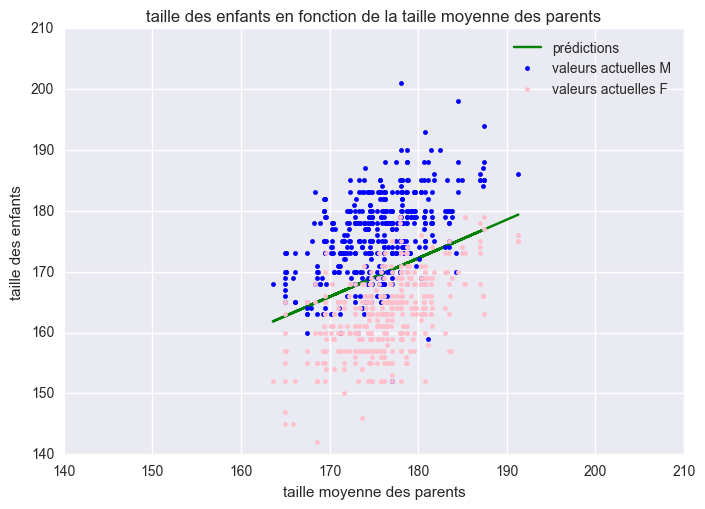

In [372]:
#######################################################################
########################        8       ###############################
#######################################################################

plt.figure(4)
plt.plot(X2["MeanParents"], skl_linmod2.predict(X2), label="prédictions", color="green")
#plt.plot(galton[galton["Gender"]='M'], galton)
galtonM = galton[galton["Gender"]=="M"]
galtonF = galton[galton["Gender"]=="F"]

plt.plot(galtonM["MeanParents"], galtonM["Height"], '.', color="blue", label="valeurs actuelles M")
plt.plot(galtonF["MeanParents"], galtonF["Height"], '.', color="pink",  label="valeurs actuelles F")
plt.legend()
plt.title("taille des enfants en fonction de la taille moyenne des parents")
plt.xlabel("taille moyenne des parents")
plt.ylabel("taille des enfants")
plt.axis([140, 210, 140, 210])
plt.show()



C:\Users\Mohamed\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


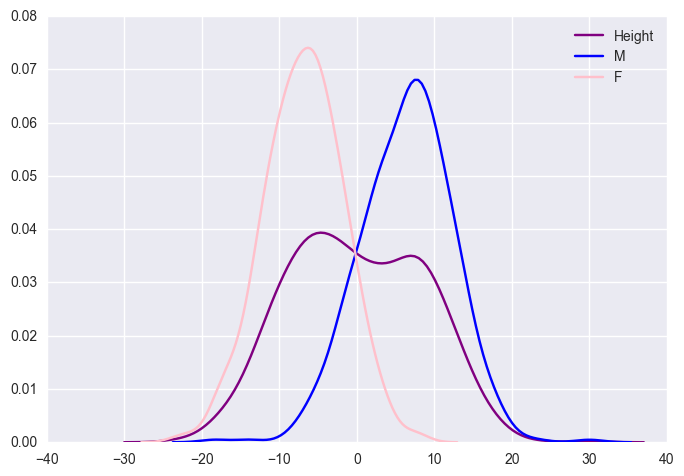

In [373]:
#######################################################################
########################        9       ###############################
#######################################################################

res = galton["Height"]-skl_linmod2.predict(X2)

resM = galtonM["Height"]-skl_linmod2.predict(galtonM[["MeanParents"]])
resF = galtonF["Height"]-skl_linmod2.predict(galtonF[["MeanParents"]])

plt.figure(5)
#plt.hist(res, bins=10, normed=True, align='mid')
sns.kdeplot(res, color="purple")
sns.kdeplot(resM, label="M", color="blue")
sns.kdeplot(resF, label="F",color="pink")

plt.show()                                                                                                                                                                                                                                                                                                                

#Les résidus semblent normaux, il faudrait effectuer un test d'hypothèse...




In [374]:
#######################################################################
########################        10       ##############################
#######################################################################

skl_linmod2inv = lm.LinearRegression(fit_intercept=True)
X3 = galton[["Height"]]
y3 = galton["MeanParents"]
X3b = galton["Height"]

skl_linmod2inv.fit(X3, y3) # Fit regression model
print (skl_linmod2.coef_, skl_linmod2.intercept_)
print (skl_linmod2inv.coef_, skl_linmod2inv.intercept_)

alpha0 = X3b.mean() + (y3.mean()*X3b.var()*(theta0-y3.mean()))/(X3b.mean()*y3.var())
alpha1 = X3.var()*theta1 / y3.var()

print(alpha0, alpha1)










[ 0.63309377] 58.255916588
[ 0.1614903] 148.437160448
-308.322252192 Height    2.481931
dtype: float64


In [375]:
#######################################################################
########################        11       ##############################
#######################################################################


skl_linmod2var= lm.LinearRegression(fit_intercept=True)

X2var = galton[["Father", "Mother"]]
y2v = galton["Height"]

skl_linmod2var.fit(X2var, y3) # Fit regression model
pred2var = skl_linmod2var.predict(X2var)

print (skl_linmod2var.coef_, skl_linmod2var.intercept_)



[ 0.5   0.54] 2.84217094304e-14


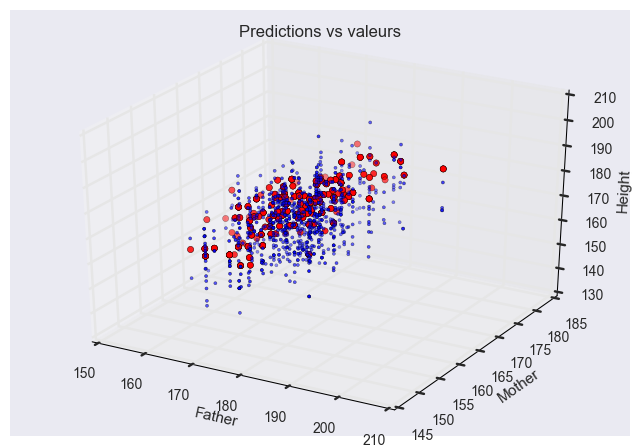

In [376]:
#######################################################################
########################        12       ##############################
#######################################################################


fig = plt.figure(6)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(galton['Father'], galton['Mother'], y2v, marker='.')
ax.scatter(galton['Father'], galton['Mother'], pred2var, marker='o', c='r')
ax.set_xlabel('Father')
ax.set_ylabel('Mother')
ax.set_zlabel('Height')
ax.set_title("Predictions vs valeurs")

plt.show()

In [377]:
#######################################################################
########################        13       ##############################
#######################################################################

normeRes = np.linalg.norm(y2v-pred2var,2)**2
print (normeRes)


104493.1124


C:\Users\Mohamed\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


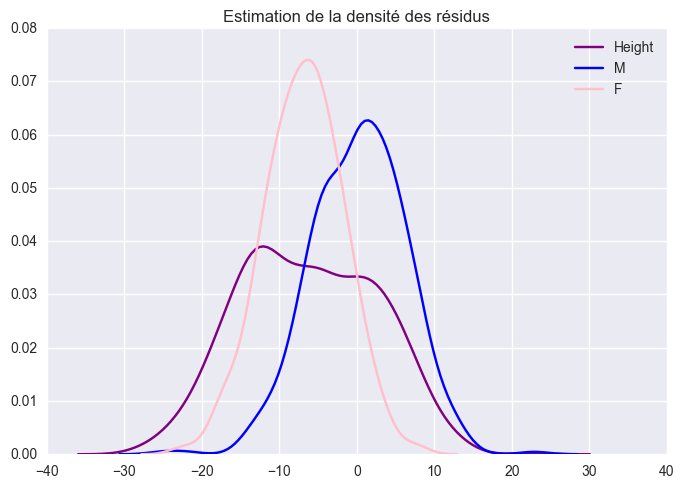

In [378]:
#######################################################################
########################        14       ##############################
#######################################################################

plt.figure(7)

res2v = y2v-pred2var

res2vM = galtonM["Height"]-skl_linmod2var.predict(galtonM[["Father", "Mother"]])
res2vF = galtonF["Height"]-skl_linmod2.predict(galtonF[["MeanParents"]])

sns.kdeplot(res2v, color="purple")
sns.kdeplot(res2vM, label="M", color='blue')
sns.kdeplot(res2vF, label="F", color='pink')
plt.title('Estimation de la densité des résidus')
plt.show()
#les résidus ne sont pas centrés et la courbe ne ressemble pas à celle d'une gaussienne...


coef de la régression : 
[ 0.26065404  0.17776266]


C:\Users\Mohamed\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


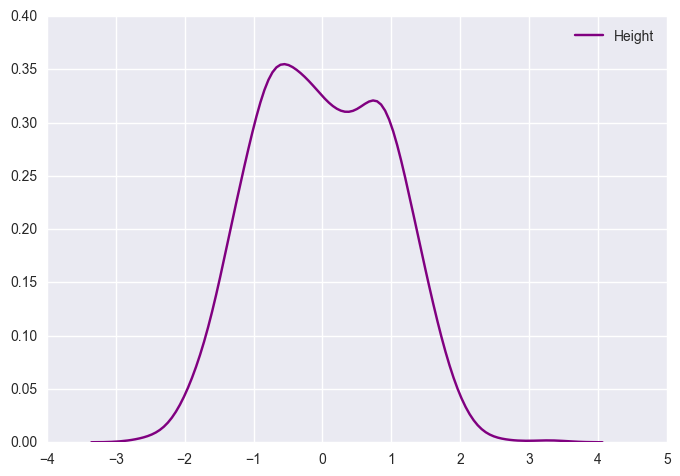

In [379]:
#######################################################################
########################        15       ##############################
#######################################################################

#La taille de la mère semble plus explicative que celle du père 

galtonCR = galton 
galtonCR["Father"] = (galtonCR["Father"]-(galtonCR["Father"].mean()))/galtonCR["Father"].std()
galtonCR["Mother"] = (galtonCR["Mother"]-(galtonCR["Mother"].mean()))/galtonCR["Mother"].std()
galtonCR["Height"] = (galtonCR["Height"]-(galtonCR["Height"].mean()))/galtonCR["Height"].std()

X2vCR = galtonCR[["Father","Mother"]]
y2vCR = galtonCR["Height"]


skl_linmod2varCR= lm.LinearRegression(fit_intercept=True)

skl_linmod2varCR.fit(X2vCR, y2vCR) # Fit regression model
print("coef de la régression : ")
print(skl_linmod2varCR.coef_)
plt.figure(7)
sns.kdeplot(y2vCR-skl_linmod2varCR.predict(X2vCR), color="purple")
plt.show()

# Exercice 2

In [380]:
#######################################################################
########################        1        ##############################
#######################################################################


df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",  delim_whitespace=True, names=["mpg","cylinders","displacement","horsepower", "weight", "acceleration", "model year", "origin", "car name"])

#"NaN" est utilisé pour les données manquantes
df = df[np.isfinite(df["mpg"])]
df = df[np.isfinite(df["horsepower"])]

print(df.head(10))


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0        8.0         307.0       130.0  3504.0          12.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5   
2  18.0        8.0         318.0       150.0  3436.0          11.0   
3  16.0        8.0         304.0       150.0  3433.0          12.0   
4  17.0        8.0         302.0       140.0  3449.0          10.5   
5  15.0        8.0         429.0       198.0  4341.0          10.0   
6  14.0        8.0         454.0       220.0  4354.0           9.0   
7  14.0        8.0         440.0       215.0  4312.0           8.5   
8  14.0        8.0         455.0       225.0  4425.0          10.0   
9  15.0        8.0         390.0       190.0  3850.0           8.5   

   model year  origin                   car name  
0        70.0     1.0  chevrolet chevelle malibu  
1        70.0     1.0          buick skylark 320  
2        70.0     1.0         plymouth satellite  
3        70.0     1.0    

In [381]:
#######################################################################
########################        2        ##############################
#######################################################################

LRauto9 = lm.LinearRegression(fit_intercept=True)

LRauto9.fit(df[["cylinders", "displacement", "horsepower", "weight","acceleration", "model year"]].head(9), df["mpg"].head(9))
print("coef de la régression : ")
print(LRauto9.coef_)
print("Coefficients de 0 : aucune influence sur mpg étant donnée que pour les 9 premières lignes ce sont les mêmes données")


coef de la régression : 
[ 0.          0.05408848 -0.0945306  -0.00424074 -0.19936701  0.        ]
Coefficients de 0 : aucune influence sur mpg étant donnée que pour les 9 premières lignes ce sont les mêmes données


In [382]:
#######################################################################
########################        3        ##############################
#######################################################################

LRauto = lm.LinearRegression(fit_intercept=True)
X = df[["cylinders", "displacement", "horsepower", "weight","acceleration", "model year"]]
XCR = (X - X.mean()) / X.std()
print(XCR.head())
YCR = (df["mpg"]- df["mpg"].mean())/df["mpg"].std() 

LRauto.fit(XCR, YCR)

print("coef de la régression : ")
print(LRauto.coef_)
print("C'est le poids et l'année qui expliquent le plus la consommation ")



   cylinders  displacement  horsepower    weight  acceleration  model year
0   1.482053      1.075915    0.663285  0.619748     -1.283618   -1.623241
1   1.482053      1.486832    1.572585  0.842258     -1.464852   -1.623241
2   1.482053      1.181033    1.182885  0.539692     -1.646086   -1.623241
3   1.482053      1.047246    1.182885  0.536160     -1.283618   -1.623241
4   1.482053      1.028134    0.923085  0.554997     -1.827320   -1.623241
coef de la régression : 
[-0.07209066  0.10294695 -0.00193001 -0.73944399  0.03014184  0.3555674 ]
C'est le poids et l'année qui expliquent le plus la consommation 


In [383]:
#######################################################################
########################        4        ##############################
#######################################################################

resAuto = YCR - LRauto.predict(XCR)
normResAuto = np.linalg.norm(resAuto,2)**2
print("norme :"+str(normResAuto))

normResAutoDiv = normResAuto / (df["mpg"].size-6)
print("norme /n-p :"+str(normResAutoDiv))

a=(np.linalg.norm(YCR - YCR.mean(),2)**2)
b=(np.linalg.norm(resAuto,2)**2 + np.linalg.norm(LRauto.predict(XCR)-YCR.mean(),2)**2)
test = np.isclose (a, b)

if test==True :
    print ("l'égalité est vérifiée")

print()


norme :74.581181986
norme /n-p :0.193215497373
l'égalité est vérifiée



In [384]:
#######################################################################
########################        5        ##############################
#######################################################################
#on centre et réduit notre variable d'entrée
varTest= ([6,225,100,3233,15.4,76]- X.mean()) / X.std()

pred = LRauto.predict([varTest])
#On décentre et déréduit
print("prediction : "+str(pred*df["mpg"].std()+df["mpg"].mean())) 


prediction : [ 21.77622018]


In [385]:
#######################################################################
########################        6        ##############################
#######################################################################

poly = PolynomialFeatures(2, interaction_only=False)
dfVarSelect = df[["cylinders", "displacement", "horsepower", "weight","acceleration", "model year"]]
dfPoly = poly.fit_transform(dfVarSelect)

target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(dfVarSelect.columns,p) for p in poly.powers_]]

dfPolyCR = (dfPoly-dfPoly.mean())/dfPoly.std() 
dfPolyCRpd = pd.DataFrame(dfPolyCR, columns = target_feature_names)
print(dfPolyCRpd.columns)


Index(['', 'cylinders^1', 'displacement^1', 'horsepower^1', 'weight^1',
       'acceleration^1', 'model year^1', 'cylinders^2',
       'cylinders^1xdisplacement^1', 'cylinders^1xhorsepower^1',
       'cylinders^1xweight^1', 'cylinders^1xacceleration^1',
       'cylinders^1xmodel year^1', 'displacement^2',
       'displacement^1xhorsepower^1', 'displacement^1xweight^1',
       'displacement^1xacceleration^1', 'displacement^1xmodel year^1',
       'horsepower^2', 'horsepower^1xweight^1', 'horsepower^1xacceleration^1',
       'horsepower^1xmodel year^1', 'weight^2', 'weight^1xacceleration^1',
       'weight^1xmodel year^1', 'acceleration^2',
       'acceleration^1xmodel year^1', 'model year^2'],
      dtype='object')


In [386]:
#######################################################################
########################        7        ##############################
#######################################################################

dummies = pd.get_dummies(df['origin'])
print(dummies.shape)

for col in dummies.columns:
    df["catégorie "+str(col)]= dummies[int(col)]
    

LRautoCat = lm.LinearRegression(fit_intercept=False)

LRautoCat.fit(df[["cylinders", "displacement", "horsepower", "weight","acceleration", "model year", "catégorie 1.0", "catégorie 2.0","catégorie 3.0"]], YCR)

print(LRautoCat.coef_)
print("C'est les voitures des USA (cat 1) qui ont une influence plus significative sur y")

(392, 3)
[ -6.27429794e-02   3.07221282e-03  -2.32971769e-03  -8.59753708e-04
   1.01349084e-02   9.95549255e-02  -5.30435371e+00  -4.96739025e+00
  -4.93878991e+00]
C'est les voitures des USA (cat 1) qui ont une influence plus significative sur y


In [387]:
#######################################################################
########################        8        ##############################
#######################################################################

test = []
for item in df["car name"]:
    test.append(item.split()[0])

df['brand'] = test

dummiesBrand = pd.get_dummies(df['brand'])
print(df['brand'])
print(dummiesBrand.shape)




0       chevrolet
1           buick
2        plymouth
3             amc
4            ford
5            ford
6       chevrolet
7        plymouth
8         pontiac
9             amc
15          dodge
16       plymouth
18      chevrolet
19          buick
20         toyota
21       plymouth
22            amc
23           ford
24         datsun
25     volkswagen
26        peugeot
27           audi
28           saab
29            bmw
30            amc
31           ford
32          chevy
33          dodge
34             hi
35         datsun
          ...    
375     chevrolet
376     chevrolet
377     chevrolet
378       pontiac
379         dodge
380       pontiac
381          ford
383    volkswagen
384         mazda
385         mazda
386      plymouth
387       mercury
388        nissan
389         honda
390        toyota
391         honda
392         honda
393        datsun
394         buick
395    oldsmobile
396      chrysler
397          ford
398        toyota
399         dodge
400     ch

In [388]:
#######################################################################
########################        9        ##############################
#######################################################################

X_svd=df[['cylinders','displacement','horsepower','weight','acceleration','model year']]
svd=np.linalg.svd(X_svd,full_matrices=False)
U= svd[0]
H = np.dot(U,np.transpose(U))
HH = np.dot(H,H)

orthogonal = np.isclose (HH, H).all()
if orthogonal == True : 
   print('H est orthogonal')

X_svd['leviers'] =np.diag(H)
X_svd.sort_values('leviers', ascending = False)

H est orthogonal


C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,cylinders,displacement,horsepower,weight,acceleration,model year,leviers
19,8.0,455.0,225.0,3086.0,10.0,70.0,0.186476
34,8.0,304.0,193.0,4732.0,18.5,70.0,0.080754
8,8.0,455.0,225.0,4425.0,10.0,70.0,0.061674
32,8.0,307.0,200.0,4376.0,15.0,70.0,0.060268
33,8.0,318.0,210.0,4382.0,13.5,70.0,0.059784
6,8.0,454.0,220.0,4354.0,9.0,70.0,0.056279
123,8.0,400.0,230.0,4278.0,9.5,73.0,0.051628
31,8.0,360.0,215.0,4615.0,14.0,70.0,0.051507
102,8.0,455.0,225.0,4951.0,11.0,73.0,0.050289
7,8.0,440.0,215.0,4312.0,8.5,70.0,0.045852
